In [118]:
#Vidu2.1

In [119]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [120]:
wind = ctrl.Antecedent(np.arange(0.7, 3.2, 0.1), 'wind')
temperature = ctrl.Antecedent(np.arange(20.4, 40.3, 0.1), 'temperature')
rainfall = ctrl.Consequent(np.arange(0.2, 9.2, 0.1), 'rainfall')

In [121]:
wind['very_low'] = fuzz.trimf(wind.universe, [0.7, 1.1, 1.5])
wind['low'] = fuzz.trimf(wind.universe, [1.1, 1.5, 1.9])
wind['normal'] = fuzz.trimf(wind.universe, [1.5, 1.9, 2.3])
wind['high'] = fuzz.trimf(wind.universe, [1.9, 2.3, 2.7])
wind['very_high'] = fuzz.trimf(wind.universe, [2.3, 2.7, 3.1])

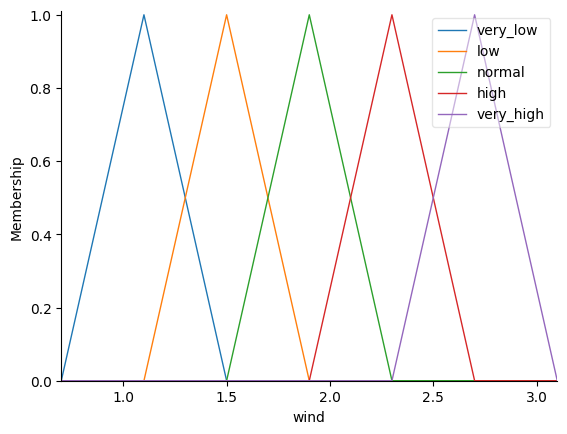

In [122]:
wind.view()

In [123]:
temperature['very_low'] = fuzz.trimf(temperature.universe, [20.4, 23.6, 26.8])
temperature['low'] = fuzz.trimf(temperature.universe, [23.6, 26.8, 30])
temperature['normal'] = fuzz.trimf(temperature.universe, [26.8, 30, 33.2])
temperature['high'] = fuzz.trimf(temperature.universe, [30, 33.2, 36.4])
temperature['very_high'] = fuzz.trimf(temperature.universe, [33.2, 36.4, 39.6])

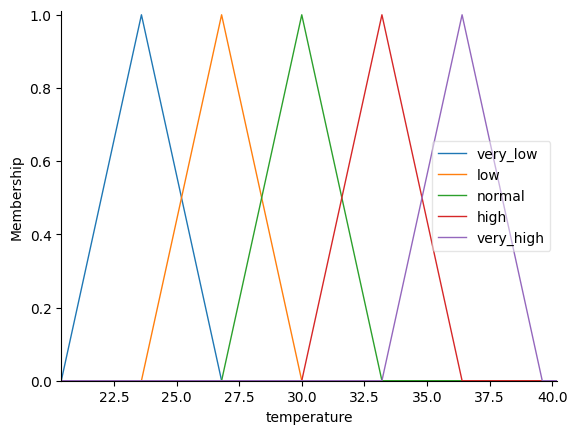

In [124]:
temperature.view()

In [125]:
rainfall['very_low'] = fuzz.trimf(rainfall.universe, [0.2, 1.7, 3.2])
rainfall['low'] = fuzz.trimf(rainfall.universe, [1.7, 3.2, 4.7])
rainfall['normal'] = fuzz.trimf(rainfall.universe, [3.2, 4.7, 6.2])
rainfall['high'] = fuzz.trimf(rainfall.universe, [4.7, 6.2, 7.7])
rainfall['very_high'] = fuzz.trimf(rainfall.universe, [6.2, 7.7, 9.2])

In [126]:
rule1 = ctrl.Rule(wind['very_low'] | temperature['very_low'], rainfall['very_low'])
rule2 = ctrl.Rule(wind['low'], rainfall['low'])
rule3 = ctrl.Rule(temperature['normal'], rainfall['normal'])
rule4 = ctrl.Rule(wind['high'] & temperature['high'], rainfall['high'])
rule5 = ctrl.Rule(wind['very_high'] | temperature['very_high'], rainfall['very_high'])
rule6 = ctrl.Rule(wind['normal'] & temperature['low'], rainfall['low'])

In [127]:
rainfalling_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])

In [128]:
rainfalling = ctrl.ControlSystemSimulation(rainfalling_ctrl)

In [129]:
rainfalling.input['wind'] = 2.2
rainfalling.input['temperature'] = 30

In [130]:
rainfalling.compute()

Lượng mưa dự đoán: 4.70


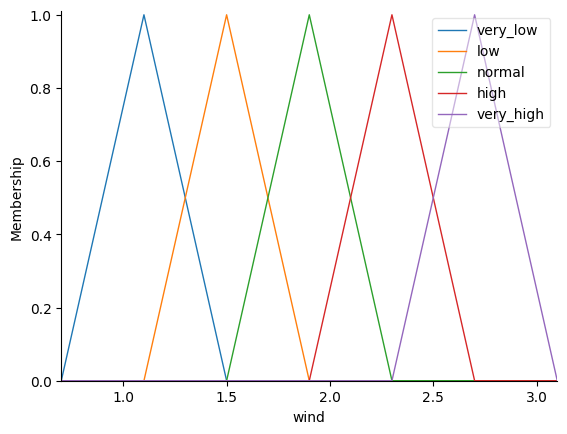

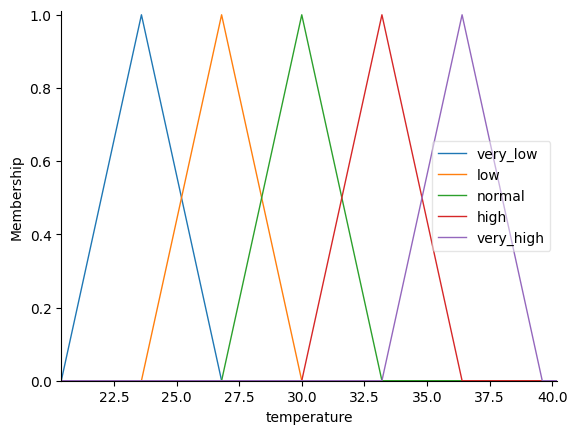

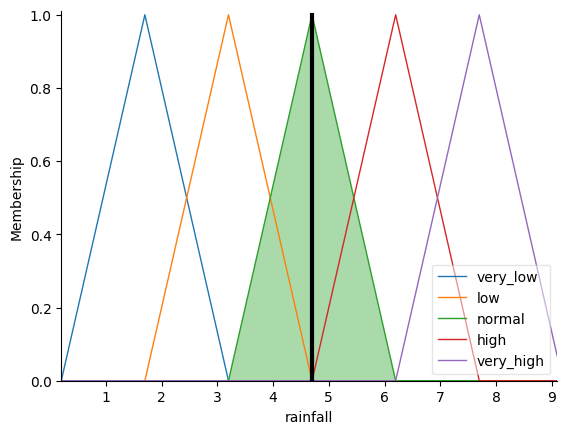

In [131]:
print(f"Lượng mưa dự đoán: {rainfalling.output['rainfall']:.2f}")
wind.view()
temperature.view()
rainfall.view(sim=rainfalling)

In [132]:
#Vidu2.2

In [133]:
blood_sugar = ctrl.Antecedent(np.arange(0, 301.1, 0.1), 'Blood_Sugar')
bmi = ctrl.Antecedent(np.arange(0, 41.1, 0.1), 'BMI')
urination = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'Urination')
fatigue = ctrl.Antecedent(np.arange(0, 4.1, 0.1), 'Fatigue')
diabetes_risk = ctrl.Consequent(np.arange(0, 101.1, 0.1), 'Diabetes_Risk')

In [134]:
blood_sugar['low'] = fuzz.trimf(blood_sugar.universe, [0, 0, 80])
blood_sugar['normal'] = fuzz.trimf(blood_sugar.universe, [80, 100, 120])
blood_sugar['high'] = fuzz.trimf(blood_sugar.universe, [120, 160, 200])
blood_sugar['very_high'] = fuzz.trimf(blood_sugar.universe, [160, 200, 300])

In [135]:
bmi['underweight'] = fuzz.trimf(bmi.universe, [0, 0, 18.5])
bmi['normal'] = fuzz.trimf(bmi.universe, [18.5, 21.7, 24.9])
bmi['overweight'] = fuzz.trimf(bmi.universe, [24.9, 27.4, 29.9])
bmi['obese'] = fuzz.trimf(bmi.universe, [29.9, 35, 40])

In [136]:
fatigue['low'] = fuzz.trimf(fatigue.universe, [0, 0, 0])
fatigue['medium'] = fuzz.trimf(fatigue.universe, [0, 1, 1])
fatigue['high'] = fuzz.trimf(fatigue.universe, [1, 2, 2])

In [137]:
diabetes_risk['low'] = fuzz.trimf(diabetes_risk.universe, [0, 0, 40])
diabetes_risk['medium'] = fuzz.trimf(diabetes_risk.universe, [20, 50, 80])
diabetes_risk['high'] = fuzz.trimf(diabetes_risk.universe, [60, 80, 100])
diabetes_risk['very_high'] = fuzz.trimf(diabetes_risk.universe, [80, 100, 100])

In [138]:
urination['rarely'] = fuzz.trimf(urination.universe, [0, 0, 0])
urination['sometimes'] = fuzz.trimf(urination.universe, [0, 1, 1])
urination['often'] = fuzz.trimf(urination.universe, [1, 2, 2])

In [139]:
rule1 = ctrl.Rule(blood_sugar['very_high'] & urination['often'], diabetes_risk['very_high'])
rule2 = ctrl.Rule(blood_sugar['very_high'] & urination['sometimes'], diabetes_risk['high'])
rule3 = ctrl.Rule(blood_sugar['high'] & urination['often'], diabetes_risk['high'])
rule4 = ctrl.Rule(blood_sugar['normal'] & urination['rarely'], diabetes_risk['low'])
rule5 = ctrl.Rule(blood_sugar['very_high'] & bmi['obese'], diabetes_risk['very_high'])
rule6 = ctrl.Rule(blood_sugar['very_high'] & bmi['overweight'], diabetes_risk['high'])
rule7 = ctrl.Rule(blood_sugar['high'] & bmi['overweight'], diabetes_risk['high'])
rule8 = ctrl.Rule(blood_sugar['high'] & bmi['overweight'], diabetes_risk['medium'])
rule9 = ctrl.Rule(blood_sugar['normal'] & bmi['normal'], diabetes_risk['low'])
rule10 = ctrl.Rule(blood_sugar['very_high'] & fatigue['high'], diabetes_risk['very_high'])
rule11 = ctrl.Rule(blood_sugar['high'] & fatigue['high'], diabetes_risk['high'])
rule12 = ctrl.Rule(blood_sugar['high'] & fatigue['medium'], diabetes_risk['medium'])
rule13 = ctrl.Rule(blood_sugar['normal'] & fatigue['low'], diabetes_risk['low'])

In [140]:
diabetes_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13])

In [141]:
diabetes = ctrl.ControlSystemSimulation(diabetes_ctrl)

In [142]:
diabetes.input['Blood_Sugar'] = 180
diabetes.input['BMI'] = 28
diabetes.input['Urination'] = 1
diabetes.input['Fatigue'] = 1

In [143]:
diabetes.compute()

In [144]:
print(f"Nguy cơ tiểu đườngg: {diabetes.output['Diabetes_Risk']:.2f}")

Nguy cơ tiểu đườngg: 61.12


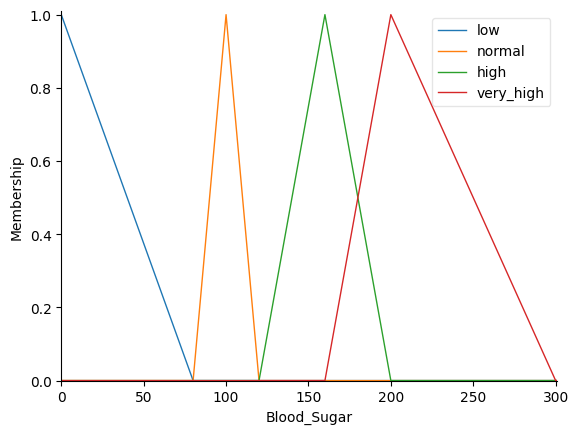

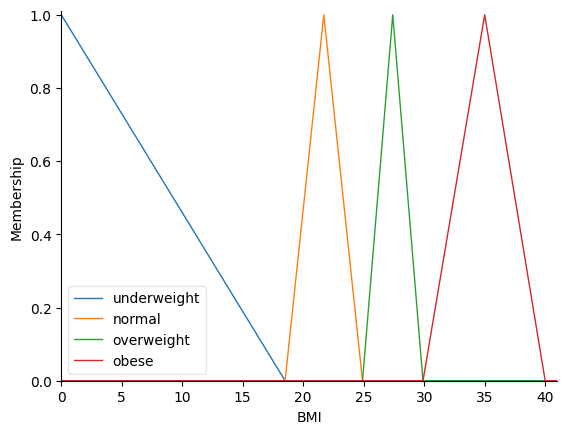

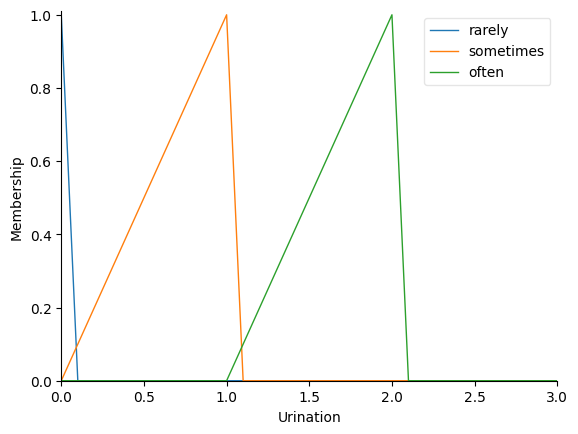

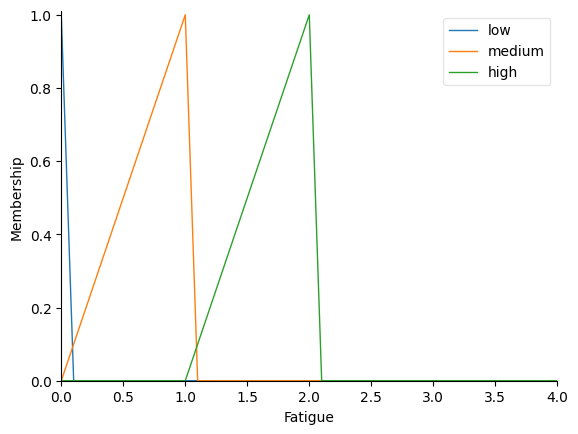

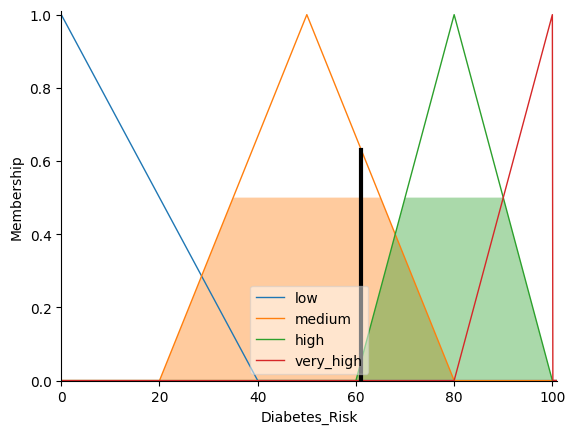

In [145]:
blood_sugar.view()
bmi.view()
urination.view()
fatigue.view()
diabetes_risk.view(sim=diabetes)

In [146]:
#vidu2.3

In [147]:
demand = ctrl.Antecedent(np.arange(0, 11, 1), 'Demand')
competitor_price = ctrl.Antecedent(np.arange(0, 11, 1), 'Competitor_Price')
production_cost = ctrl.Antecedent(np.arange(0, 11, 1), 'Production_Cost')
seasonality = ctrl.Antecedent(np.arange(0, 2, 1), 'Seasonality')
inventory = ctrl.Antecedent(np.arange(0, 11, 1), 'Inventory')
price = ctrl.Consequent(np.arange(0, 101, 1), 'Price')

In [148]:
demand['low'] = fuzz.trimf(demand.universe, [0, 0, 5])
demand['medium'] = fuzz.trimf(demand.universe, [0, 5, 10])
demand['high'] = fuzz.trimf(demand.universe, [5, 10, 10])

In [149]:
competitor_price['low'] = fuzz.trimf(competitor_price.universe, [0, 0, 5])
competitor_price['medium'] = fuzz.trimf(competitor_price.universe, [0, 5, 10])
competitor_price['high'] = fuzz.trimf(competitor_price.universe, [5, 10, 10])

In [150]:
production_cost['low'] = fuzz.trimf(production_cost.universe, [0, 0, 5])
production_cost['medium'] = fuzz.trimf(production_cost.universe, [0, 5, 10])
production_cost['high'] = fuzz.trimf(production_cost.universe, [5, 10, 10])

In [151]:
seasonality['off_peak'] = fuzz.trimf(seasonality.universe, [0, 0, 1])
seasonality['peak'] = fuzz.trimf(seasonality.universe, [0, 1, 1])

In [152]:
inventory['low'] = fuzz.trimf(inventory.universe, [0, 0, 5])
inventory['medium'] = fuzz.trimf(inventory.universe, [0, 5, 10])
inventory['high'] = fuzz.trimf(inventory.universe, [5, 10, 10])

In [153]:
price['very_low'] = fuzz.trimf(price.universe, [0, 0, 25])
price['low'] = fuzz.trimf(price.universe, [0, 25, 50])
price['medium'] = fuzz.trimf(price.universe, [25, 50, 75])
price['high'] = fuzz.trimf(price.universe, [50, 75, 100])
price['very_high'] = fuzz.trimf(price.universe, [75, 100, 100])


In [154]:
rule1_high = ctrl.Rule(demand['high'] & competitor_price['high'] & inventory['low'], price['high'])
rule2_high = ctrl.Rule(demand['high'] & seasonality['peak'] & inventory['low'], price['high'])
rule3_high = ctrl.Rule(demand['medium'] & production_cost['high'] & inventory['low'], price['high'])

In [155]:
rule1_medium = ctrl.Rule(demand['medium'] & competitor_price['medium'] & inventory['medium'], price['medium'])
rule2_medium = ctrl.Rule(demand['medium'] & competitor_price['high'] & inventory['medium'], price['medium'])
rule3_medium = ctrl.Rule(demand['low'] & competitor_price['high'] & inventory['medium'], price['medium'])
rule4_medium = ctrl.Rule(demand['medium'] & production_cost['medium'] & inventory['medium'], price['medium'])

In [156]:
rule1_low = ctrl.Rule(demand['low'] & competitor_price['low'] & inventory['high'], price['low'])
rule2_low = ctrl.Rule(demand['medium'] & production_cost['medium'] & inventory['high'], price['low'])
rule3_low = ctrl.Rule(demand['low'] & seasonality['off_peak'] & inventory['high'], price['low'])


In [157]:
rule1_very_low = ctrl.Rule(demand['low'] & competitor_price['low'] & inventory['low'], price['very_low'])
rule2_very_low = ctrl.Rule(demand['low'] & seasonality['off_peak'] & inventory['low'], price['very_low'])
rule3_very_low = ctrl.Rule(demand['medium'] & competitor_price['low'] & inventory['low'], price['very_low'])

In [158]:
price_ctrl = ctrl.ControlSystem([rule1_high, rule2_high, rule3_high, rule1_medium, rule2_medium, rule3_medium, rule4_medium, rule1_low, rule2_low, rule3_low, rule1_very_low, rule2_very_low, rule3_very_low])

In [159]:
price_sim = ctrl.ControlSystemSimulation(price_ctrl)


In [160]:
price_sim.input['Demand'] = 7
price_sim.input['Competitor_Price'] = 6
price_sim.input['Production_Cost'] = 5
price_sim.input['Seasonality'] = 1
price_sim.input['Inventory'] = 4

In [161]:
price_sim.compute()

In [162]:
print(f"Giá sản phẩm được đề xuất: {price_sim.output['Price']:.2f}")

Giá sản phẩm được đề xuất: 56.73


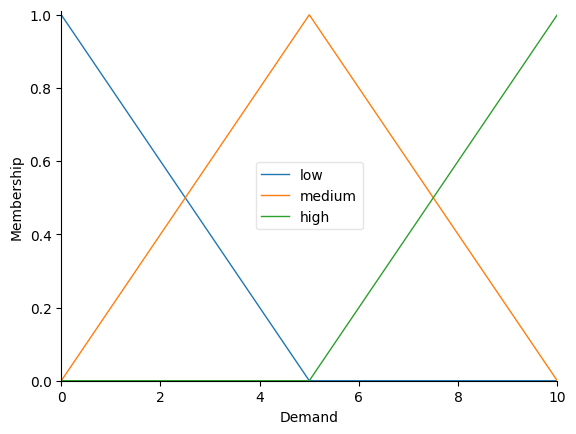

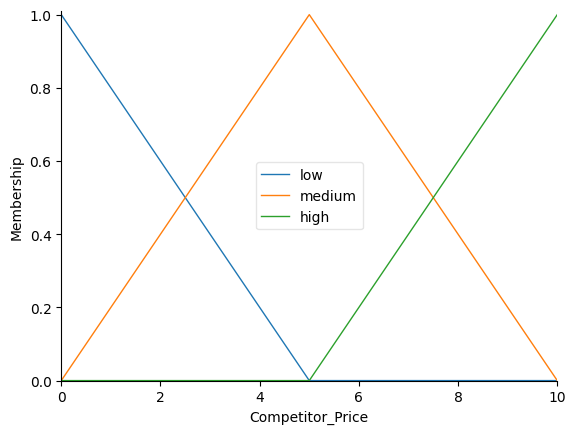

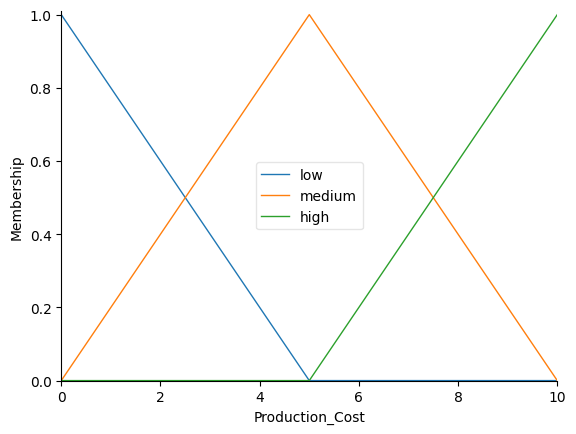

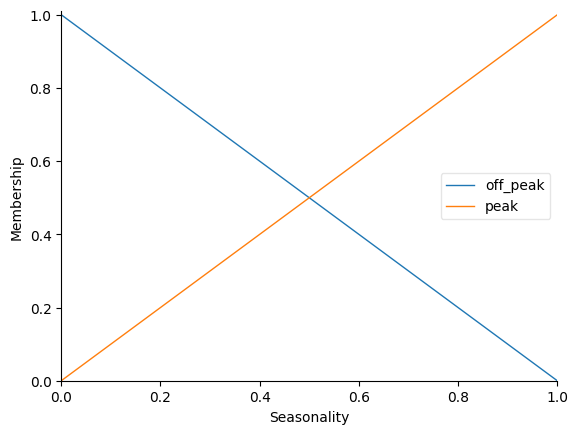

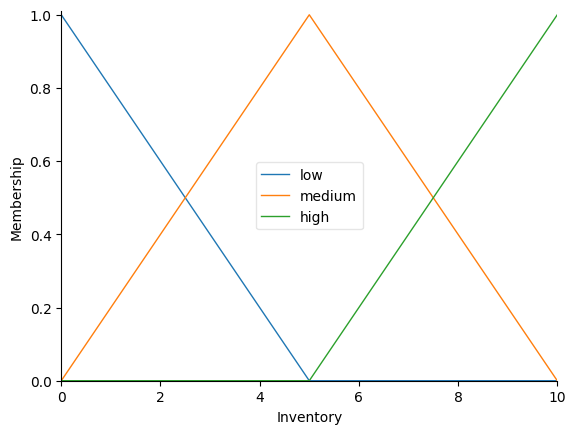

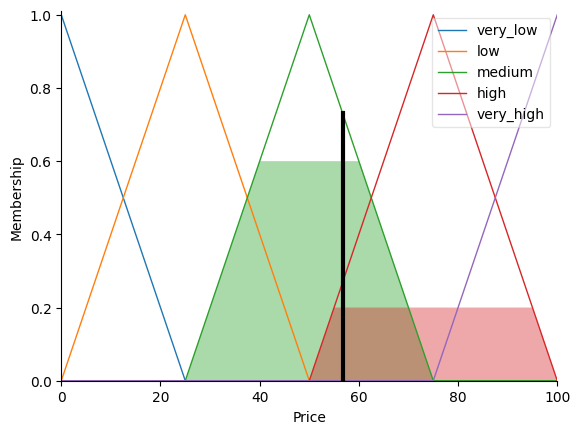

In [163]:
demand.view()
competitor_price.view()
production_cost.view()
seasonality.view()
inventory.view()
price.view(sim=price_sim)

In [164]:
#vi du 2.4

In [165]:
load = ctrl.Antecedent(np.arange(0, 101, 1), 'Load')
dirt_level = ctrl.Antecedent(np.arange(0, 101, 1), 'Dirt_Level')
fabric_type = ctrl.Antecedent(np.arange(0, 3, 1), 'Fabric_Type')
wash_time = ctrl.Consequent(np.arange(0, 121, 1), 'Wash_Time')
water_level = ctrl.Consequent(np.arange(0, 101, 1), 'Water_Level')

In [166]:
load['small'] = fuzz.trimf(load.universe, [0, 0, 50])
load['medium'] = fuzz.trimf(load.universe, [0, 50, 100])
load['large'] = fuzz.trimf(load.universe, [50, 100, 100])

In [167]:
dirt_level['low'] = fuzz.trimf(dirt_level.universe, [0, 0, 50])
dirt_level['medium'] = fuzz.trimf(dirt_level.universe, [0, 50, 100])
dirt_level['high'] = fuzz.trimf(dirt_level.universe, [50, 100, 100])

In [168]:
fabric_type['delicate'] = fuzz.trimf(fabric_type.universe, [0, 0, 0])
fabric_type['normal'] = fuzz.trimf(fabric_type.universe, [0, 1, 1])
fabric_type['heavy'] = fuzz.trimf(fabric_type.universe, [1, 2, 2])

In [169]:
wash_time['short'] = fuzz.trimf(wash_time.universe, [0, 0, 40])
wash_time['medium'] = fuzz.trimf(wash_time.universe, [20, 60, 100])
wash_time['long'] = fuzz.trimf(wash_time.universe, [80, 120, 120])
wash_time['very_long'] = fuzz.trimf(wash_time.universe, [100, 120, 120])

In [170]:
water_level['low'] = fuzz.trimf(water_level.universe, [0, 0, 50])
water_level['medium'] = fuzz.trimf(water_level.universe, [0, 50, 100])
water_level['high'] = fuzz.trimf(water_level.universe, [50, 100, 100])
water_level['very_high'] = fuzz.trimf(water_level.universe, [80, 100, 100])

In [171]:
rule1 = ctrl.Rule(load['small'] & dirt_level['low'], (wash_time['short'], water_level['low']))
rule2 = ctrl.Rule(load['small'] & dirt_level['medium'], (wash_time['medium'], water_level['medium']))
rule3 = ctrl.Rule(load['small'] & dirt_level['high'], (wash_time['long'], water_level['medium']))
rule4 = ctrl.Rule(load['medium'] & dirt_level['low'], (wash_time['medium'], water_level['medium']))
rule5 = ctrl.Rule(load['medium'] & dirt_level['medium'], (wash_time['long'], water_level['medium']))
rule6 = ctrl.Rule(load['medium'] & dirt_level['high'], (wash_time['long'], water_level['high']))
rule7 = ctrl.Rule(load['large'] & dirt_level['low'], (wash_time['medium'], water_level['high']))
rule8 = ctrl.Rule(load['large'] & dirt_level['medium'], (wash_time['long'], water_level['high']))
rule9 = ctrl.Rule(load['large'] & dirt_level['high'], (wash_time['long'], water_level['high']))
rule12 = ctrl.Rule(fabric_type['delicate'], (wash_time['short'], water_level['low']))
rule14 = ctrl.Rule(fabric_type['heavy'], (wash_time['long'], water_level['high']))
rule15 = ctrl.Rule(load['large'] & dirt_level['high'] & fabric_type['heavy'], (wash_time['very_long'], water_level['very_high']))
rule16 = ctrl.Rule(load['small'] & dirt_level['low'] & fabric_type['delicate'], (wash_time['short'], water_level['low']))
rule17 = ctrl.Rule(load['medium'] & dirt_level['medium'] & fabric_type['normal'], (wash_time['medium'], water_level['medium']))

In [172]:
washing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule12, rule14, rule15, rule16, rule17])

In [173]:
washing_sim = ctrl.ControlSystemSimulation(washing_ctrl)


In [174]:
washing_sim.input['Load'] = 70
washing_sim.input['Dirt_Level'] = 80
washing_sim.input['Fabric_Type'] = 2

In [175]:
washing_sim.compute()

In [176]:
print(f"Thời gian giặt được đề xuất: {washing_sim.output['Wash_Time']:.2f} phút")
print(f"Mực nước được đề xuất: {washing_sim.output['Water_Level']:.2f}%")

Thời gian giặt được đề xuất: 106.67 phút
Mực nước được đề xuất: 61.85%


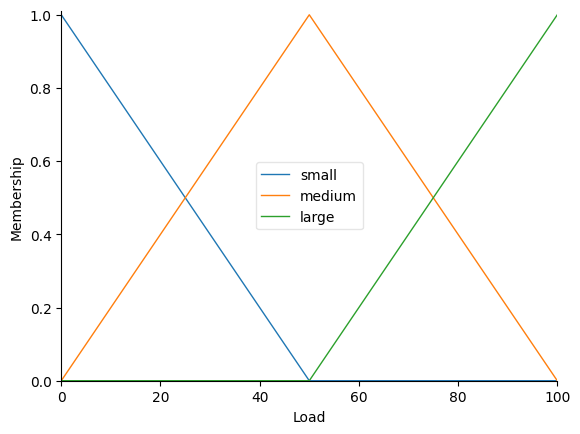

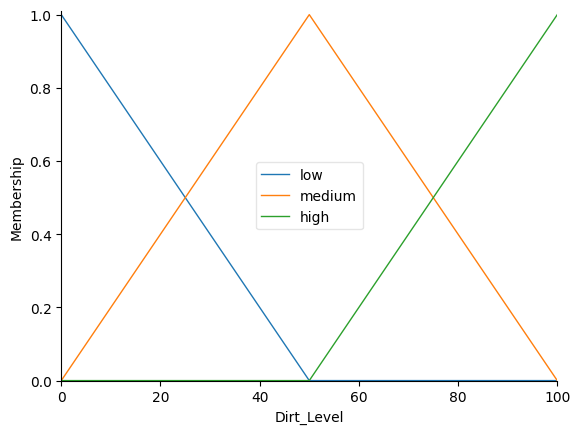

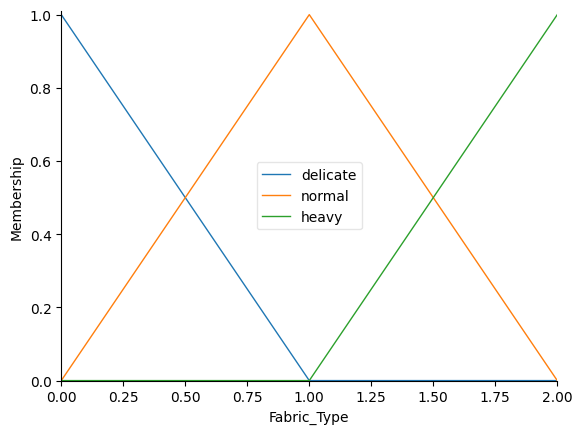

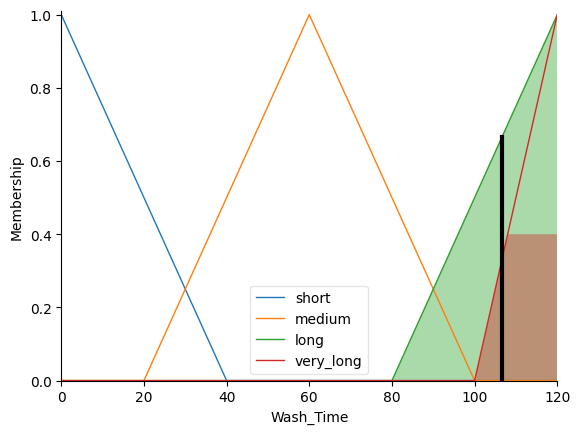

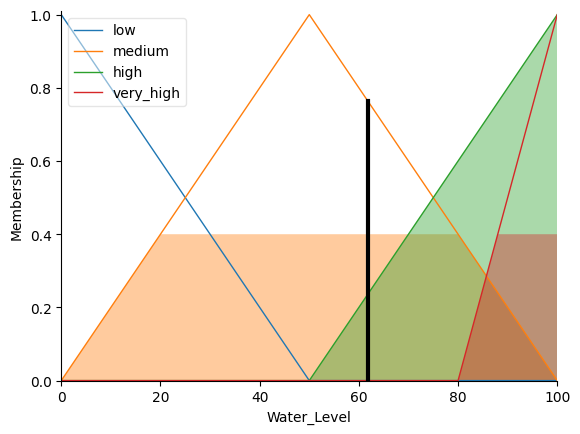

In [177]:
load.view()
dirt_level.view()
fabric_type.view()
wash_time.view(sim=washing_sim)
water_level.view(sim=washing_sim)

In [178]:
#vi du2.5

In [179]:
temperature = ctrl.Antecedent(np.arange(15, 41, 1), 'Temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'Humidity')
people = ctrl.Antecedent(np.arange(0, 11, 1), 'People')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'Fan_Speed')
cooling_level = ctrl.Consequent(np.arange(0, 101, 1), 'Cooling_Level')

In [180]:
temperature['cold'] = fuzz.trimf(temperature.universe, [15, 15, 20])
temperature['cool'] = fuzz.trimf(temperature.universe, [18, 20, 25])
temperature['comfortable'] = fuzz.trimf(temperature.universe, [22, 25, 28])
temperature['warm'] = fuzz.trimf(temperature.universe, [25, 28, 32])
temperature['hot'] = fuzz.trimf(temperature.universe, [30, 35, 40])

In [181]:
humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 40])
humidity['medium'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['high'] = fuzz.trimf(humidity.universe, [60, 80, 100])

In [182]:
people['few'] = fuzz.trimf(people.universe, [0, 0, 3])
people['moderate'] = fuzz.trimf(people.universe, [2, 5, 8])
people['many'] = fuzz.trimf(people.universe, [5, 8, 10])

In [183]:
fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [0, 50, 100])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

In [184]:
cooling_level['low'] = fuzz.trimf(cooling_level.universe, [0, 0, 50])
cooling_level['medium'] = fuzz.trimf(cooling_level.universe, [0, 50, 100])
cooling_level['high'] = fuzz.trimf(cooling_level.universe, [50, 100, 100])

In [185]:
rule1_fan = ctrl.Rule(temperature['cold'], fan_speed['low'])
rule2_fan = ctrl.Rule(temperature['cool'], fan_speed['low'])
rule3_fan = ctrl.Rule(temperature['comfortable'], fan_speed['medium'])
rule4_fan = ctrl.Rule(temperature['warm'], fan_speed['high'])
rule5_fan = ctrl.Rule(temperature['hot'], fan_speed['high'])
rule1_cooling = ctrl.Rule(temperature['cold'], cooling_level['low'])
rule2_cooling = ctrl.Rule(temperature['cool'], cooling_level['low'])
rule3_cooling = ctrl.Rule(temperature['comfortable'], cooling_level['medium'])
rule4_cooling = ctrl.Rule(temperature['warm'], cooling_level['high'])
rule5_cooling = ctrl.Rule(temperature['hot'], cooling_level['high'])
rule6_cooling = ctrl.Rule(humidity['low'], cooling_level['low'])
rule7_cooling = ctrl.Rule(humidity['medium'], cooling_level['medium'])
rule8_cooling = ctrl.Rule(humidity['high'], cooling_level['high'])
rule9_fan = ctrl.Rule(people['few'], fan_speed['low'])
rule10_fan = ctrl.Rule(people['moderate'], fan_speed['medium'])
rule11_fan = ctrl.Rule(people['many'], fan_speed['high'])
rule12 = ctrl.Rule(temperature['hot'] & humidity['high'] & people['many'], (cooling_level['high'], fan_speed['high']))
rule13 = ctrl.Rule(temperature['comfortable'] & humidity['medium'] & people['moderate'], (cooling_level['medium'], fan_speed['medium']))
rule14 = ctrl.Rule(temperature['cool'] & humidity['low'] & people['few'], (cooling_level['low'], fan_speed['low']))


In [186]:
ac_ctrl = ctrl.ControlSystem([rule1_fan, rule2_fan, rule3_fan, rule4_fan, rule5_fan,
                               rule1_cooling, rule2_cooling, rule3_cooling, rule4_cooling, rule5_cooling,
                               rule6_cooling, rule7_cooling, rule8_cooling,
                               rule9_fan, rule10_fan, rule11_fan,
                               rule12, rule13, rule14])

In [187]:
ac_sim = ctrl.ControlSystemSimulation(ac_ctrl)

In [188]:
ac_sim.input['Temperature'] = 32
ac_sim.input['Humidity'] = 70
ac_sim.input['People'] = 6

In [189]:
ac_sim.compute()

Tốc độ quạt được đề xuất: 53.58%
Mức độ làm mát được đề xuất: 80.56%


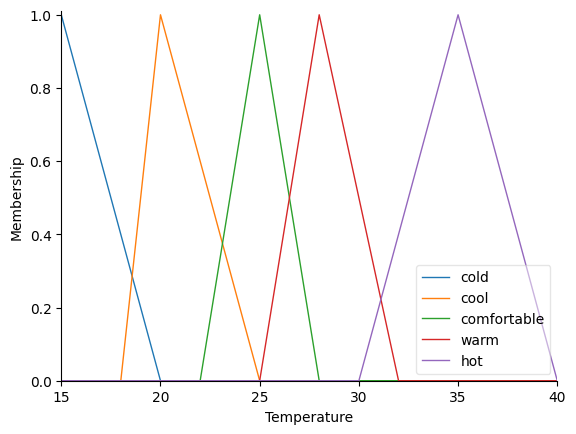

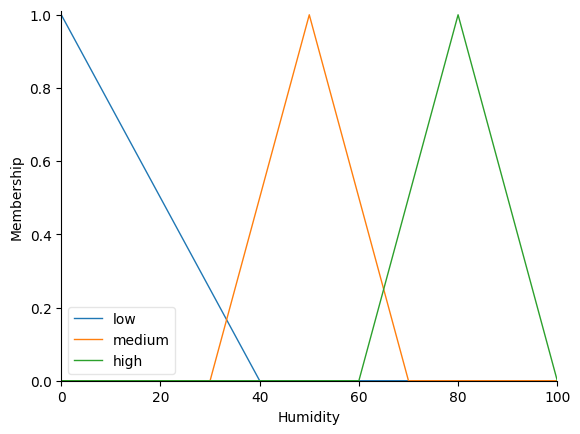

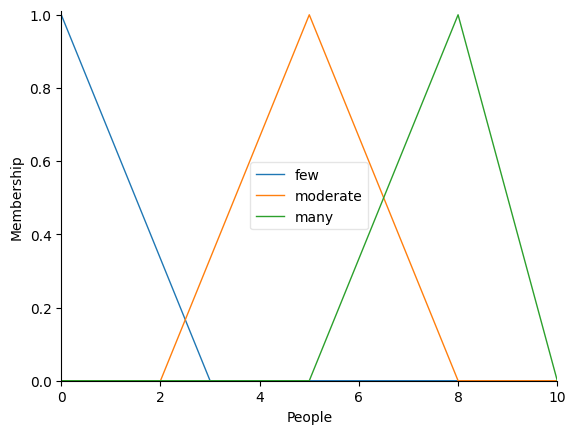

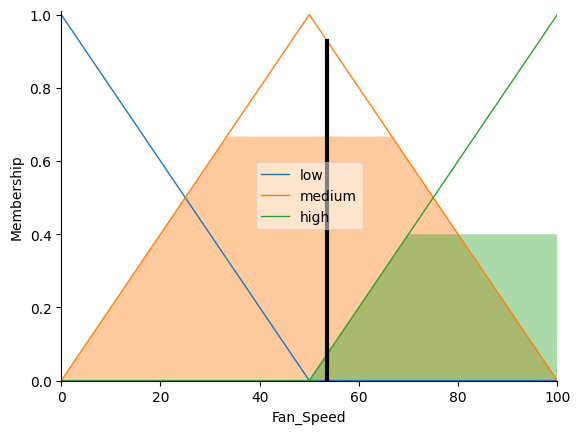

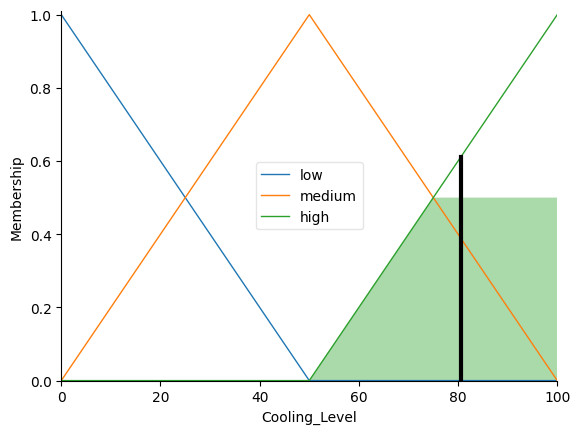

In [190]:
print(f"Tốc độ quạt được đề xuất: {ac_sim.output['Fan_Speed']:.2f}%")
print(f"Mức độ làm mát được đề xuất: {ac_sim.output['Cooling_Level']:.2f}%")

temperature.view()
humidity.view()
people.view()
fan_speed.view(sim=ac_sim)
cooling_level.view(sim=ac_sim)

In [191]:
#vi du 2.6

In [192]:
weight = ctrl.Antecedent(np.arange(0.1, 5.1, 0.1), 'Weight')
food_type = ctrl.Antecedent(np.arange(0, 3, 1), 'Food_Type')
initial_temp = ctrl.Antecedent(np.arange(-20, 61, 1), 'Initial_Temperature')

cooking_time = ctrl.Consequent(np.arange(1, 31, 1), 'Cooking_Time')
power_level = ctrl.Consequent(np.arange(1, 101, 1), 'Power_Level')


In [193]:
weight['light'] = fuzz.trimf(weight.universe, [0.1, 0.1, 1.5])
weight['medium'] = fuzz.trimf(weight.universe, [1, 2.5, 4])
weight['heavy'] = fuzz.trimf(weight.universe, [3.5, 5, 5])
food_type['soft'] = fuzz.trimf(food_type.universe, [0, 0, 0])
food_type['normal'] = fuzz.trimf(food_type.universe, [0, 1, 1])
food_type['hard'] = fuzz.trimf(food_type.universe, [1, 2, 2])


In [194]:
initial_temp['cold'] = fuzz.trimf(initial_temp.universe, [-20, -20, 10])
initial_temp['warm'] = fuzz.trimf(initial_temp.universe, [0, 25, 40])
initial_temp['hot'] = fuzz.trimf(initial_temp.universe, [30, 50, 60])
cooking_time['short'] = fuzz.trimf(cooking_time.universe, [1, 1, 10])
cooking_time['medium'] = fuzz.trimf(cooking_time.universe, [8, 15, 22])
cooking_time['long'] = fuzz.trimf(cooking_time.universe, [18, 25, 30])
power_level['low'] = fuzz.trimf(power_level.universe, [1, 1, 40])
power_level['medium'] = fuzz.trimf(power_level.universe, [30, 60, 80])
power_level['high'] = fuzz.trimf(power_level.universe, [70, 100, 100])

In [195]:
rule1_time_weight = ctrl.Rule(weight['light'], cooking_time['short'])
rule2_time_weight = ctrl.Rule(weight['medium'], cooking_time['medium'])
rule3_time_weight = ctrl.Rule(weight['heavy'], cooking_time['long'])
rule1_power_food = ctrl.Rule(food_type['soft'], power_level['low'])
rule2_power_food = ctrl.Rule(food_type['normal'], power_level['medium'])
rule3_power_food = ctrl.Rule(food_type['hard'], power_level['high'])
rule1_time_temp = ctrl.Rule(initial_temp['cold'], cooking_time['long'])
rule2_time_temp = ctrl.Rule(initial_temp['warm'], cooking_time['medium'])
rule3_time_temp = ctrl.Rule(initial_temp['hot'], cooking_time['short'])
rule_combine_1 = ctrl.Rule(weight['heavy'] & food_type['hard'] & initial_temp['cold'], (cooking_time['long'], power_level['high']))
rule_combine_2 = ctrl.Rule(weight['medium'] & food_type['soft'] & initial_temp['warm'], (cooking_time['medium'], power_level['low']))
rule_combine_3 = ctrl.Rule(weight['light'] & food_type['normal'] & initial_temp['hot'], (cooking_time['short'], power_level['medium']))


In [196]:
microwave_ctrl = ctrl.ControlSystem([rule1_time_weight, rule2_time_weight, rule3_time_weight,
                                     rule1_power_food, rule2_power_food, rule3_power_food,
                                     rule1_time_temp, rule2_time_temp, rule3_time_temp,
                                     rule_combine_1, rule_combine_2, rule_combine_3])

In [197]:
microwave_sim = ctrl.ControlSystemSimulation(microwave_ctrl)


In [198]:
microwave_sim.input['Weight'] = 0.8
microwave_sim.input['Food_Type'] = 1
microwave_sim.input['Initial_Temperature'] = 5

Thời gian nấu được đề xuất: 12.14 phút
Mức công suất được đề xuất: 56.67%


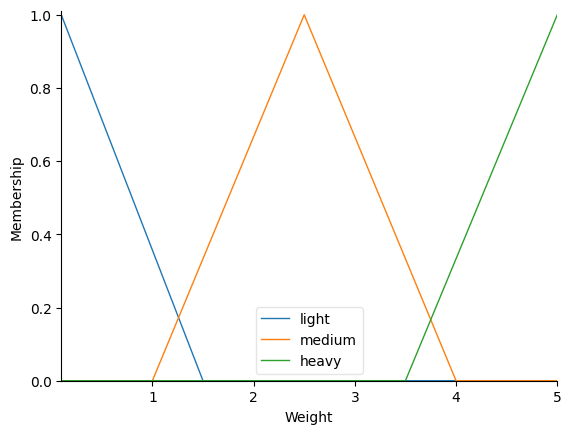

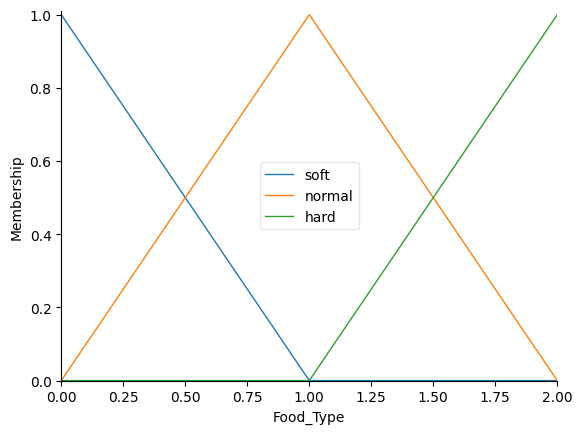

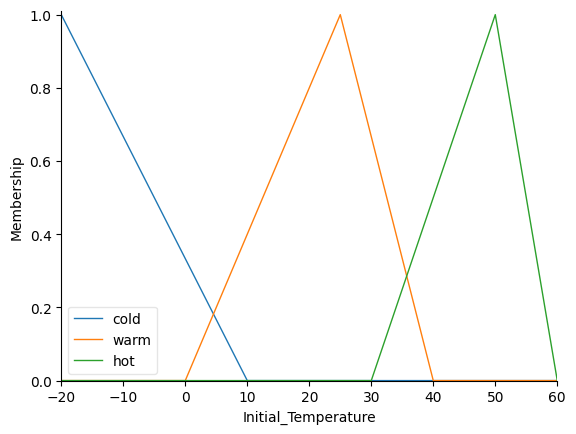

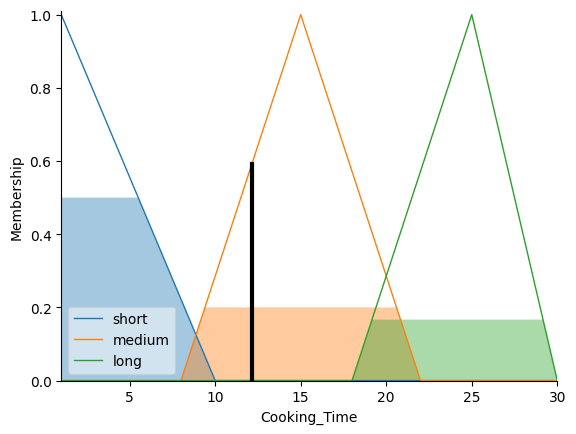

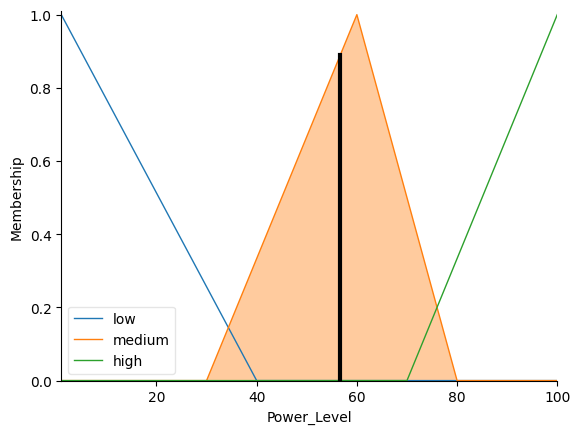

In [199]:
microwave_sim.compute()
print(f"Thời gian nấu được đề xuất: {microwave_sim.output['Cooking_Time']:.2f} phút")
print(f"Mức công suất được đề xuất: {microwave_sim.output['Power_Level']:.2f}%")
weight.view()
food_type.view()
initial_temp.view()
cooking_time.view(sim=microwave_sim)
power_level.view(sim=microwave_sim)

In [200]:
#vi du 2.7

In [201]:
food_type = ctrl.Antecedent(np.arange(0, 3, 1), 'Food_Type')
weight = ctrl.Antecedent(np.arange(0.1, 5.1, 0.1), 'Weight')
initial_temp = ctrl.Antecedent(np.arange(0, 61, 1), 'Initial_Temperature')
water_content = ctrl.Antecedent(np.arange(0, 101, 1), 'Water_Content')

cooking_time = ctrl.Consequent(np.arange(1, 121, 1), 'Cooking_Time')
heat_level = ctrl.Consequent(np.arange(1, 101, 1), 'Heat_Level')

In [202]:
food_type['soft'] = fuzz.trimf(food_type.universe, [0, 0, 0])
food_type['normal'] = fuzz.trimf(food_type.universe, [0, 1, 1])
food_type['hard'] = fuzz.trimf(food_type.universe, [1, 2, 2])
weight['light'] = fuzz.trimf(weight.universe, [0.1, 0.1, 1.5])
weight['medium'] = fuzz.trimf(weight.universe, [1, 2.5, 4])
weight['heavy'] = fuzz.trimf(weight.universe, [3.5, 5, 5])
initial_temp['cold'] = fuzz.trimf(initial_temp.universe, [0, 0, 10])
initial_temp['warm'] = fuzz.trimf(initial_temp.universe, [20, 25, 30])
initial_temp['hot'] = fuzz.trimf(initial_temp.universe, [40, 50, 60])
water_content['low'] = fuzz.trimf(water_content.universe, [0, 0, 30])
water_content['medium'] = fuzz.trimf(water_content.universe, [20, 50, 80])
water_content['high'] = fuzz.trimf(water_content.universe, [70, 100, 100])
cooking_time['short'] = fuzz.trimf(cooking_time.universe, [1, 1, 40])
cooking_time['medium'] = fuzz.trimf(cooking_time.universe, [30, 60, 90])
cooking_time['long'] = fuzz.trimf(cooking_time.universe, [80, 120, 120])
heat_level['low'] = fuzz.trimf(heat_level.universe, [1, 1, 40])
heat_level['medium'] = fuzz.trimf(heat_level.universe, [30, 60, 80])
heat_level['high'] = fuzz.trimf(heat_level.universe, [70, 100, 100])


In [203]:
rule1_time = ctrl.Rule(food_type['soft'] & weight['light'] & initial_temp['warm'], cooking_time['short'])
rule2_time = ctrl.Rule(food_type['normal'] & weight['medium'] & initial_temp['cold'], cooking_time['medium'])
rule3_time = ctrl.Rule(food_type['hard'] & weight['heavy'] & initial_temp['cold'], cooking_time['long'])
rule4_time = ctrl.Rule(initial_temp['cold'], cooking_time['medium'])
rule5_time = ctrl.Rule(weight['heavy'], cooking_time['medium'])
rule6_time = ctrl.Rule(water_content['low'], cooking_time['short'])
rule7_time = ctrl.Rule(water_content['medium'], cooking_time['medium'])
rule8_time = ctrl.Rule(water_content['high'], cooking_time['long'])
rule1_heat = ctrl.Rule(food_type['soft'], heat_level['low'])
rule2_heat = ctrl.Rule(food_type['normal'], heat_level['medium'])
rule3_heat = ctrl.Rule(food_type['hard'], heat_level['high'])
rule4_heat = ctrl.Rule(weight['light'], heat_level['medium'])
rule5_heat = ctrl.Rule(weight['heavy'], heat_level['high'])
rule6_heat = ctrl.Rule(initial_temp['cold'], heat_level['high'])
rule7_heat = ctrl.Rule(initial_temp['warm'], heat_level['medium'])
rule8_heat = ctrl.Rule(initial_temp['hot'], heat_level['low'])
rule9_heat = ctrl.Rule(water_content['low'], heat_level['high'])
rule10_heat = ctrl.Rule(water_content['medium'], heat_level['medium'])
rule11_heat = ctrl.Rule(water_content['high'], heat_level['low'])


In [204]:
cooker_ctrl = ctrl.ControlSystem([rule1_time, rule2_time, rule3_time, rule4_time, rule5_time, rule6_time, rule7_time, rule8_time,
                                   rule1_heat, rule2_heat, rule3_heat, rule4_heat, rule5_heat, rule6_heat, rule7_heat, rule8_heat, rule9_heat, rule10_heat, rule11_heat])
cooker_sim = ctrl.ControlSystemSimulation(cooker_ctrl)

In [205]:
cooker_sim.input['Food_Type'] = 1
cooker_sim.input['Weight'] = 2.0
cooker_sim.input['Initial_Temperature'] = 5
cooker_sim.input['Water_Content'] = 60


In [206]:
cooker_sim.compute()

Thời gian nấu được đề xuất: 60.00 phút
Mức nhiệt được đề xuất: 66.24%


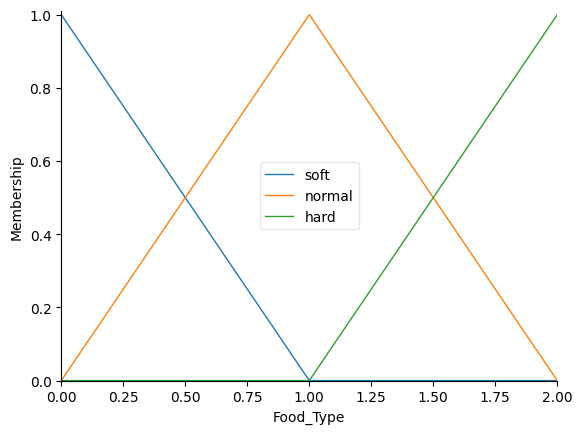

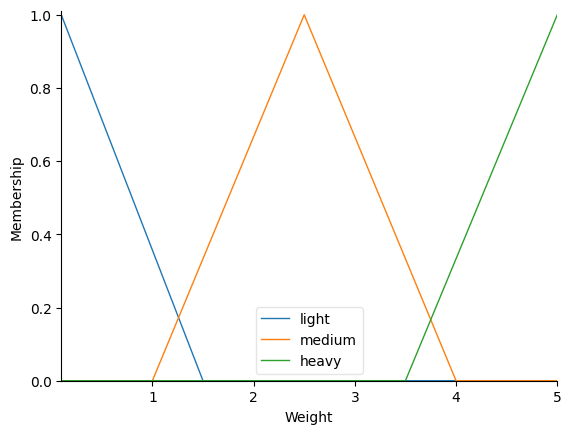

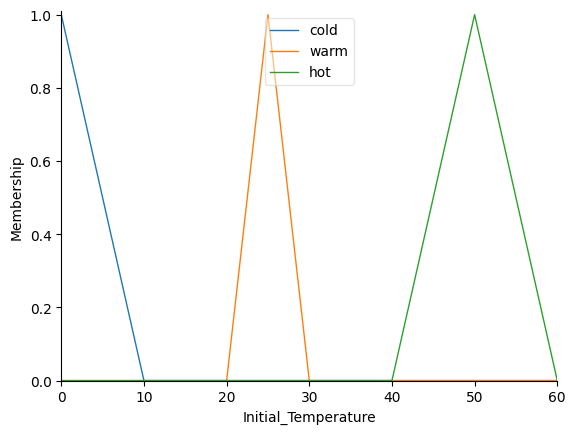

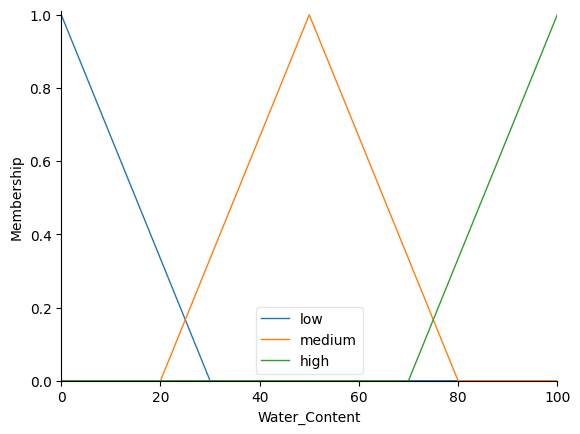

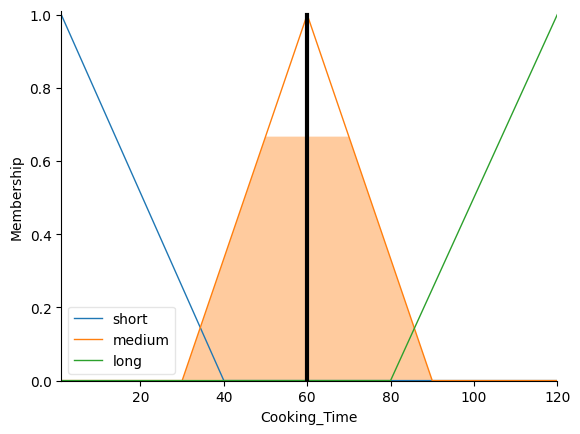

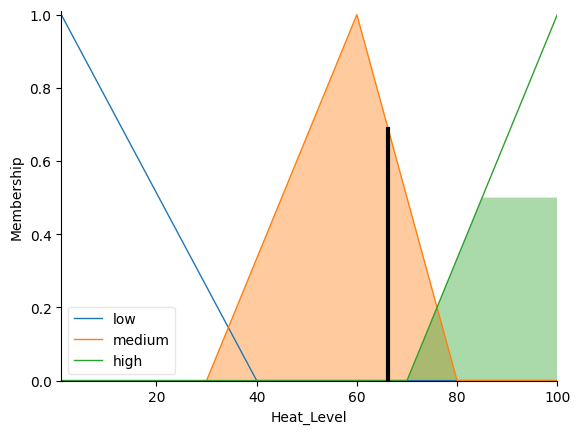

In [207]:
print(f"Thời gian nấu được đề xuất: {cooker_sim.output['Cooking_Time']:.2f} phút")
print(f"Mức nhiệt được đề xuất: {cooker_sim.output['Heat_Level']:.2f}%")
food_type.view()
weight.view()
initial_temp.view()
water_content.view()
cooking_time.view(sim=cooker_sim)
heat_level.view(sim=cooker_sim)

In [208]:
#vi du 2.8

In [209]:
heart_rate = ctrl.Antecedent(np.arange(30, 181, 1), 'Heart_Rate')
blood_pressure = ctrl.Antecedent(np.arange(40, 201, 1), 'Blood_Pressure')
body_temperature = ctrl.Antecedent(np.arange(25, 43, 0.1), 'Body_Temperature')
oxygen_saturation = ctrl.Antecedent(np.arange(50, 101, 1), 'Oxygen_Saturation')
blood_sugar = ctrl.Antecedent(np.arange(30, 301, 1), 'Blood_Sugar')
drug_dose = ctrl.Consequent(np.arange(0, 101, 1), 'Drug_Dose')
iv_fluid_rate = ctrl.Consequent(np.arange(0, 501, 1), 'IV_Fluid_Rate')
oxygen_therapy = ctrl.Consequent(np.arange(0, 16, 1), 'Oxygen_Therapy')

In [210]:
heart_rate['low'] = fuzz.trimf(heart_rate.universe, [30, 30, 60])
heart_rate['normal'] = fuzz.trimf(heart_rate.universe, [55, 80, 105])
heart_rate['high'] = fuzz.trimf(heart_rate.universe, [95, 130, 180])
blood_pressure['low'] = fuzz.trimf(blood_pressure.universe, [40, 40, 90])
blood_pressure['normal'] = fuzz.trimf(blood_pressure.universe, [80, 105, 130])
blood_pressure['high'] = fuzz.trimf(blood_pressure.universe, [120, 160, 200])
body_temperature['low'] = fuzz.trimf(body_temperature.universe, [25, 25, 36])
body_temperature['normal'] = fuzz.trimf(body_temperature.universe, [35.5, 36.75, 37.75])
body_temperature['high'] = fuzz.trimf(body_temperature.universe, [37.5, 39, 42])
oxygen_saturation['low'] = fuzz.trimf(oxygen_saturation.universe, [50, 50, 90])
oxygen_saturation['normal'] = fuzz.trimf(oxygen_saturation.universe, [85, 95, 100])
blood_sugar['low'] = fuzz.trimf(blood_sugar.universe, [30, 30, 70])
blood_sugar['normal'] = fuzz.trimf(blood_sugar.universe, [65, 105, 145])
blood_sugar['high'] = fuzz.trimf(blood_sugar.universe, [135, 200, 300])
drug_dose['decrease'] = fuzz.trimf(drug_dose.universe, [0, 0, 50])
drug_dose['maintain'] = fuzz.trimf(drug_dose.universe, [40, 50, 60])
drug_dose['increase'] = fuzz.trimf(drug_dose.universe, [50, 100, 100])
iv_fluid_rate['decrease'] = fuzz.trimf(iv_fluid_rate.universe, [0, 0, 200])
iv_fluid_rate['maintain'] = fuzz.trimf(iv_fluid_rate.universe, [150, 250, 350])
iv_fluid_rate['increase'] = fuzz.trimf(iv_fluid_rate.universe, [300, 500, 500])
oxygen_therapy['decrease'] = fuzz.trimf(oxygen_therapy.universe, [0, 0, 5])
oxygen_therapy['maintain'] = fuzz.trimf(oxygen_therapy.universe, [4, 7, 10])
oxygen_therapy['increase'] = fuzz.trimf(oxygen_therapy.universe, [9, 15, 15])

In [211]:
rule1_hr_bp = ctrl.Rule(heart_rate['low'] & blood_pressure['low'], (iv_fluid_rate['increase'], drug_dose['increase']))
rule2_hr_bp = ctrl.Rule(heart_rate['high'] & blood_pressure['high'], (drug_dose['decrease'],))
rule3_hr_bp = ctrl.Rule(heart_rate['normal'] & blood_pressure['normal'], (drug_dose['maintain'],))
rule4_temp_oxy = ctrl.Rule(body_temperature['high'] & oxygen_saturation['low'], (oxygen_therapy['increase'], drug_dose['increase']))
rule5_temp_oxy = ctrl.Rule(body_temperature['normal'] & oxygen_saturation['normal'], ())
rule6_temp_oxy = ctrl.Rule(body_temperature['low'] & oxygen_saturation['low'], (oxygen_therapy['increase'], iv_fluid_rate['increase']))
rule7_sugar = ctrl.Rule(blood_sugar['high'], (drug_dose['increase'],))
rule8_sugar = ctrl.Rule(blood_sugar['low'], (drug_dose['decrease'],))
rule9_sugar = ctrl.Rule(blood_sugar['normal'], (drug_dose['maintain'],))
rule10_combine = ctrl.Rule(blood_pressure['high'] & blood_sugar['high'] & heart_rate['high'], (drug_dose['decrease'],))
rule11_combine = ctrl.Rule(blood_pressure['low'] & oxygen_saturation['low'] & heart_rate['low'], (iv_fluid_rate['increase'], oxygen_therapy['increase'], drug_dose['increase']))
rule12_combine = ctrl.Rule(body_temperature['high'] & blood_pressure['high'] & oxygen_saturation['normal'], (drug_dose['increase'], oxygen_therapy['maintain']))

In [212]:
treatment_ctrl = ctrl.ControlSystem([rule1_hr_bp, rule2_hr_bp, rule3_hr_bp,
                                       rule4_temp_oxy, rule5_temp_oxy, rule6_temp_oxy,
                                       rule7_sugar, rule8_sugar, rule9_sugar,
                                       rule10_combine, rule11_combine, rule12_combine])

In [213]:
treatment_sim = ctrl.ControlSystemSimulation(treatment_ctrl)
treatment_sim.input['Heart_Rate'] = 50
treatment_sim.input['Blood_Pressure'] = 80
treatment_sim.input['Body_Temperature'] = 36.5
treatment_sim.input['Oxygen_Saturation'] = 80
treatment_sim.input['Blood_Sugar'] = 180
treatment_sim.compute()


Liều dùng thuốc được đề xuất (%): 82.13
Tốc độ truyền dịch được đề xuất (ml/giờ): 409.63
Liệu pháp oxy được đề xuất (L/phút): 12.29


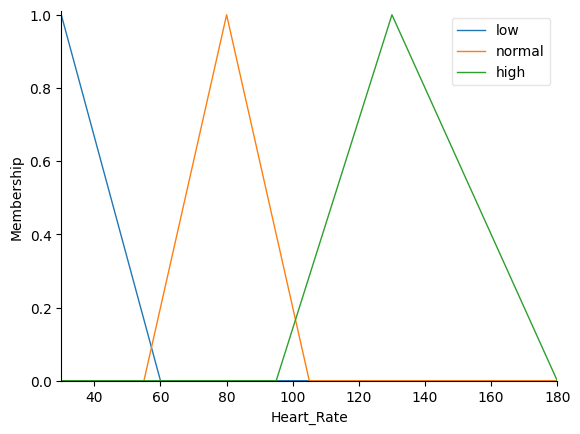

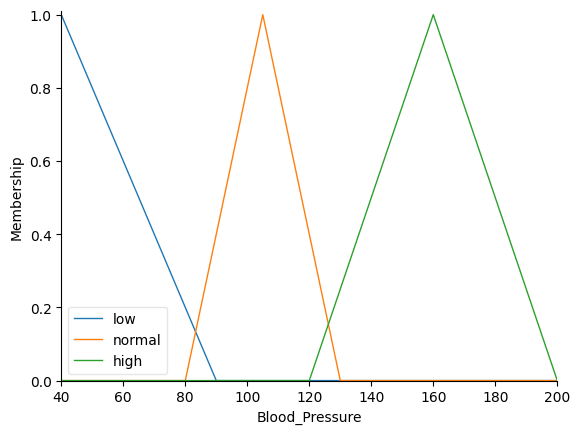

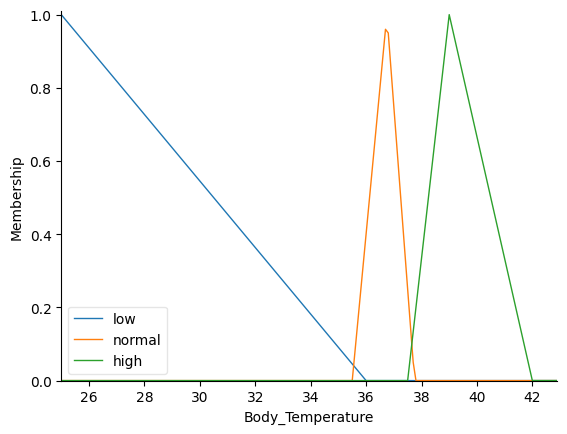

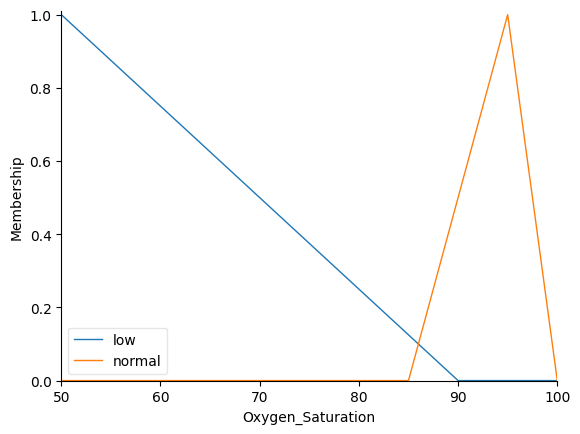

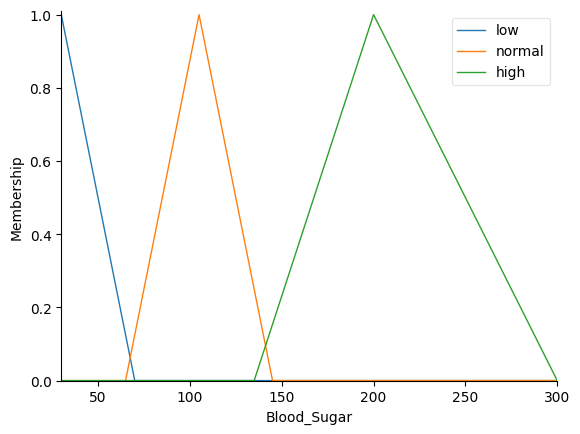

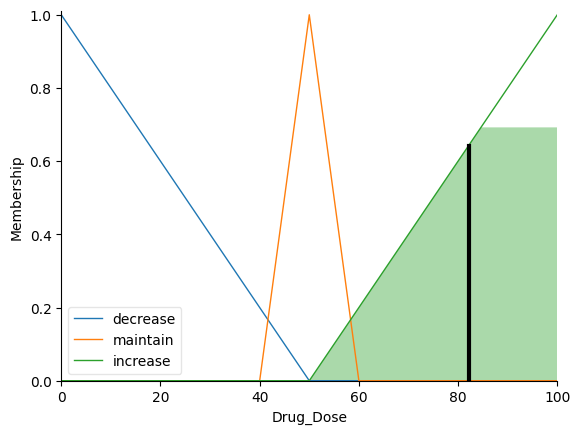

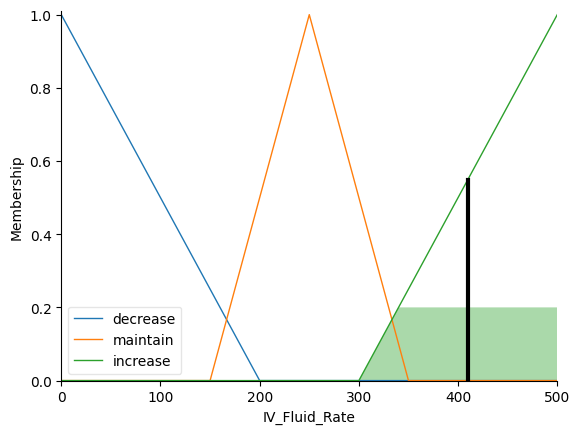

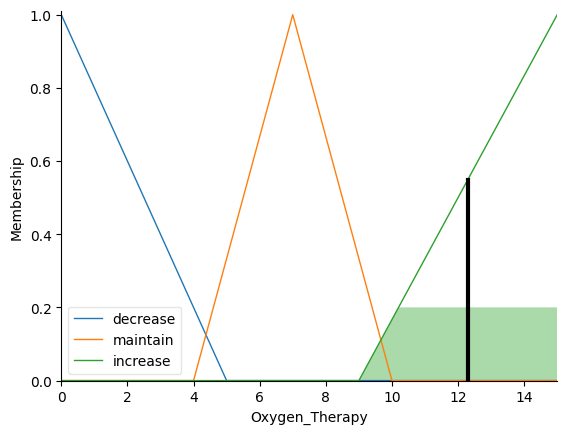

In [214]:
print(f"Liều dùng thuốc được đề xuất (%): {treatment_sim.output['Drug_Dose']:.2f}")
print(f"Tốc độ truyền dịch được đề xuất (ml/giờ): {treatment_sim.output['IV_Fluid_Rate']:.2f}")
print(f"Liệu pháp oxy được đề xuất (L/phút): {treatment_sim.output['Oxygen_Therapy']:.2f}")
heart_rate.view()
blood_pressure.view()
body_temperature.view()
oxygen_saturation.view()
blood_sugar.view()
drug_dose.view(sim=treatment_sim)
iv_fluid_rate.view(sim=treatment_sim)
oxygen_therapy.view(sim=treatment_sim)

In [215]:
#vi du 2.9

In [216]:
sentiment_score = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Sentiment_Score')
emotion_intensity = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Emotion_Intensity')
positive_words = ctrl.Antecedent(np.arange(0, 21, 1), 'Positive_Words')
negative_words = ctrl.Antecedent(np.arange(0, 21, 1), 'Negative_Words')

review_sentiment = ctrl.Consequent(np.arange(0, 3, 1), 'Review_Sentiment')

In [217]:
sentiment_score['negative'] = fuzz.trimf(sentiment_score.universe, [0, 0, 0.3])
sentiment_score['neutral'] = fuzz.trimf(sentiment_score.universe, [0.2, 0.5, 0.8])
sentiment_score['positive'] = fuzz.trimf(sentiment_score.universe, [0.7, 1, 1])
emotion_intensity['low'] = fuzz.trimf(emotion_intensity.universe, [0, 0, 0.4])
emotion_intensity['medium'] = fuzz.trimf(emotion_intensity.universe, [0.3, 0.5, 0.7])
emotion_intensity['high'] = fuzz.trimf(emotion_intensity.universe, [0.6, 1, 1])
positive_words['few'] = fuzz.trimf(positive_words.universe, [0, 0, 2])
positive_words['some'] = fuzz.trimf(positive_words.universe, [1, 3, 5])
positive_words['many'] = fuzz.trimf(positive_words.universe, [4, 10, 20])
negative_words['few'] = fuzz.trimf(negative_words.universe, [0, 0, 2])
negative_words['some'] = fuzz.trimf(negative_words.universe, [1, 3, 5])
negative_words['many'] = fuzz.trimf(negative_words.universe, [4, 10, 20])
review_sentiment['negative'] = fuzz.trimf(review_sentiment.universe, [0, 0, 0])
review_sentiment['neutral'] = fuzz.trimf(review_sentiment.universe, [0, 1, 1])
review_sentiment['positive'] = fuzz.trimf(review_sentiment.universe, [1, 2, 2])

In [218]:
rule1_sentiment_intensity = ctrl.Rule(sentiment_score['negative'] & emotion_intensity['high'], review_sentiment['negative'])
rule2_sentiment_intensity = ctrl.Rule(sentiment_score['negative'] & emotion_intensity['low'], review_sentiment['neutral'])
rule3_sentiment_intensity = ctrl.Rule(sentiment_score['neutral'] & emotion_intensity['medium'], review_sentiment['neutral'])
rule4_sentiment_intensity = ctrl.Rule(sentiment_score['positive'] & emotion_intensity['high'], review_sentiment['positive'])
rule5_words = ctrl.Rule(positive_words['many'] & negative_words['few'], review_sentiment['positive'])
rule6_words = ctrl.Rule(positive_words['few'] & negative_words['many'], review_sentiment['negative'])
rule7_words = ctrl.Rule(positive_words['some'] & negative_words['some'], review_sentiment['neutral'])
rule8_combine = ctrl.Rule(sentiment_score['negative'] & negative_words['many'] & emotion_intensity['high'], review_sentiment['negative'])
rule9_combine = ctrl.Rule(sentiment_score['neutral'] & emotion_intensity['medium'] & positive_words['some'], review_sentiment['neutral'])
rule10_combine = ctrl.Rule(sentiment_score['positive'] & positive_words['many'] & emotion_intensity['high'], review_sentiment['positive'])

In [219]:
sentiment_ctrl = ctrl.ControlSystem([rule1_sentiment_intensity, rule2_sentiment_intensity, rule3_sentiment_intensity, rule4_sentiment_intensity,
                                     rule5_words, rule6_words, rule7_words,
                                     rule8_combine, rule9_combine, rule10_combine])

In [220]:
sentiment_sim = ctrl.ControlSystemSimulation(sentiment_ctrl)
sentiment_sim.input['Sentiment_Score'] = 0.1
sentiment_sim.input['Emotion_Intensity'] = 0.8
sentiment_sim.input['Positive_Words'] = 1
sentiment_sim.input['Negative_Words'] = 7
sentiment_sim.compute()

Review Sentiment Score: 0.39
Review Sentiment Classification: Negative


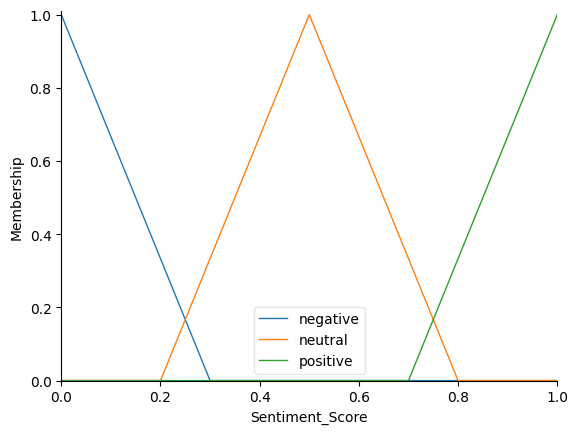

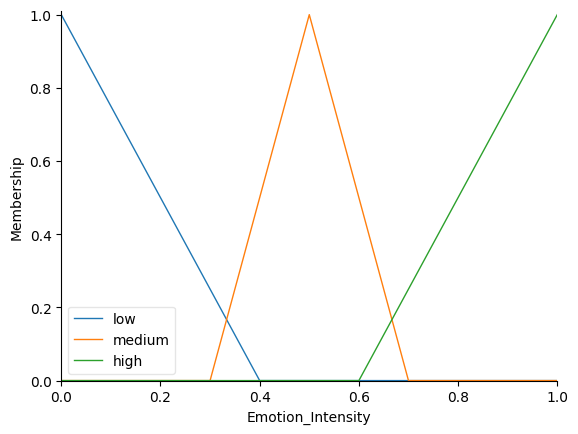

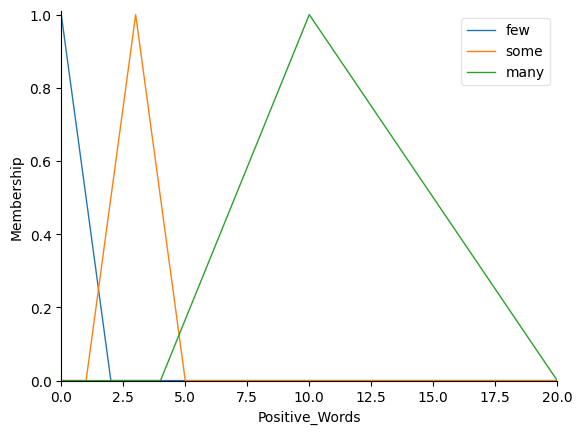

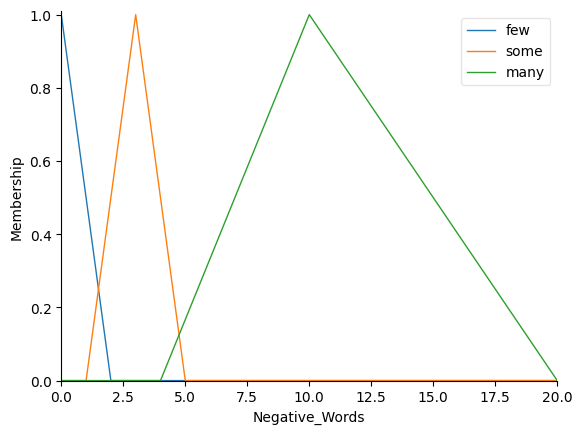

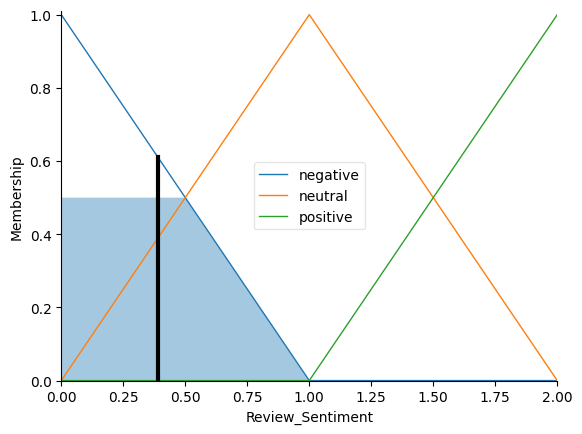

In [221]:
print(f"Review Sentiment Score: {sentiment_sim.output['Review_Sentiment']:.2f}")
def get_sentiment_label(score):
    if score <= 0.5:
        return "Negative"
    elif score <= 1.5:
        return "Neutral"
    else:
        return "Positive"

final_sentiment = get_sentiment_label(sentiment_sim.output['Review_Sentiment'])
print(f"Review Sentiment Classification: {final_sentiment}")
sentiment_score.view()
emotion_intensity.view()
positive_words.view()
negative_words.view()
review_sentiment.view(sim=sentiment_sim)

In [222]:
#vi du 2.10

In [223]:
tinh_trang_giao_thong = ctrl.Antecedent(np.arange(0, 11, 1), 'Tinh trang giao thong')
khoang_cach = ctrl.Antecedent(np.arange(0, 21, 1), 'Khoang cach')
thoi_tiet = ctrl.Antecedent(np.arange(0, 11, 1), 'Thoi tiet')
thoi_gian_chuan_bi = ctrl.Antecedent(np.arange(0, 31, 1), 'Thoi gian chuan bi')
muc_do_met_moi = ctrl.Antecedent(np.arange(0, 11, 1), 'Muc do met moi')
thoi_gian_giao_hang_uoc_tinh = ctrl.Consequent(np.arange(0, 61, 1), 'Thoi gian giao hang uoc tinh')
tien_thuong = ctrl.Consequent(np.arange(0, 101, 1), 'Tien thuong')
xep_hang = ctrl.Consequent(np.arange(1, 6, 1), 'Xep hang')
tinh_trang_giao_thong['thap'] = fuzz.trimf(tinh_trang_giao_thong.universe, [0, 0, 5])
tinh_trang_giao_thong['trung_binh'] = fuzz.trimf(tinh_trang_giao_thong.universe, [0, 5, 10])
tinh_trang_giao_thong['cao'] = fuzz.trimf(tinh_trang_giao_thong.universe, [5, 10, 10])
khoang_cach['ngan'] = fuzz.trimf(khoang_cach.universe, [0, 0, 3])
khoang_cach['trung_binh'] = fuzz.trimf(khoang_cach.universe, [0, 3, 8])
khoang_cach['dai'] = fuzz.trimf(khoang_cach.universe, [3, 8, 20])
thoi_tiet['quang_dang'] = fuzz.trimf(thoi_tiet.universe, [0, 0, 5])
thoi_tiet['mua'] = fuzz.trimf(thoi_tiet.universe, [0, 5, 10])
thoi_tiet['giong_bao'] = fuzz.trimf(thoi_tiet.universe, [5, 10, 10])
thoi_gian_chuan_bi['nhanh'] = fuzz.trimf(thoi_gian_chuan_bi.universe, [0, 0, 5])
thoi_gian_chuan_bi['trung_binh'] = fuzz.trimf(thoi_gian_chuan_bi.universe, [0, 5, 15])
thoi_gian_chuan_bi['cham'] = fuzz.trimf(thoi_gian_chuan_bi.universe, [5, 15, 30])
muc_do_met_moi['thap'] = fuzz.trimf(muc_do_met_moi.universe, [0, 0, 5])
muc_do_met_moi['trung_binh'] = fuzz.trimf(muc_do_met_moi.universe, [0, 5, 10])
muc_do_met_moi['cao'] = fuzz.trimf(muc_do_met_moi.universe, [5, 10, 10])
thoi_gian_giao_hang_uoc_tinh['ngan'] = fuzz.trimf(thoi_gian_giao_hang_uoc_tinh.universe, [0, 0, 15])
thoi_gian_giao_hang_uoc_tinh['trung_binh'] = fuzz.trimf(thoi_gian_giao_hang_uoc_tinh.universe, [10, 20, 35])
thoi_gian_giao_hang_uoc_tinh['dai'] = fuzz.trimf(thoi_gian_giao_hang_uoc_tinh.universe, [30, 45, 60])

tien_thuong['thap'] = fuzz.trimf(tien_thuong.universe, [0, 0, 30])
tien_thuong['trung_binh'] = fuzz.trimf(tien_thuong.universe, [20, 50, 80])
tien_thuong['cao'] = fuzz.trimf(tien_thuong.universe, [70, 100, 100])
xep_hang['kem'] = fuzz.trimf(xep_hang.universe, [1, 1, 2])
xep_hang['trung_binh'] = fuzz.trimf(xep_hang.universe, [2, 3, 4])
xep_hang['xuat_sac'] = fuzz.trimf(xep_hang.universe, [4, 5, 5])

In [224]:
rule1 = ctrl.Rule(tinh_trang_giao_thong['thap'] & khoang_cach['ngan'], thoi_gian_giao_hang_uoc_tinh['ngan'])
rule2 = ctrl.Rule(tinh_trang_giao_thong['trung_binh'] & khoang_cach['trung_binh'], thoi_gian_giao_hang_uoc_tinh['trung_binh'])
rule3 = ctrl.Rule(tinh_trang_giao_thong['cao'] & khoang_cach['dai'], thoi_gian_giao_hang_uoc_tinh['dai'])

rule4 = ctrl.Rule(thoi_tiet['quang_dang'], tien_thuong['thap'])
rule5 = ctrl.Rule(thoi_tiet['mua'], tien_thuong['trung_binh'])
rule6 = ctrl.Rule(thoi_tiet['giong_bao'], tien_thuong['cao'])

rule7 = ctrl.Rule(thoi_gian_chuan_bi['nhanh'] & tinh_trang_giao_thong['thap'], thoi_gian_giao_hang_uoc_tinh['ngan'])
rule8 = ctrl.Rule(thoi_gian_chuan_bi['trung_binh'] & tinh_trang_giao_thong['trung_binh'], thoi_gian_giao_hang_uoc_tinh['trung_binh'])
rule9 = ctrl.Rule(thoi_gian_chuan_bi['cham'] & tinh_trang_giao_thong['cao'], thoi_gian_giao_hang_uoc_tinh['dai'])

rule10 = ctrl.Rule(muc_do_met_moi['thap'], xep_hang['xuat_sac'])
rule11 = ctrl.Rule(muc_do_met_moi['trung_binh'], xep_hang['trung_binh'])
rule12 = ctrl.Rule(muc_do_met_moi['cao'], xep_hang['kem'])

rule13 = ctrl.Rule(khoang_cach['dai'] & thoi_tiet['giong_bao'] & tinh_trang_giao_thong['cao'], [thoi_gian_giao_hang_uoc_tinh['dai'], tien_thuong['cao']])
rule14 = ctrl.Rule(khoang_cach['ngan'] & thoi_tiet['quang_dang'] & tinh_trang_giao_thong['thap'], [thoi_gian_giao_hang_uoc_tinh['ngan'], tien_thuong['thap']])
rule15 = ctrl.Rule(muc_do_met_moi['cao'] & tinh_trang_giao_thong['cao'], [xep_hang['kem'], thoi_gian_giao_hang_uoc_tinh['dai']])

Thời gian giao hàng ước tính: 33.63279497532524
Tiền thưởng khuyến khích: 44.726273726273725
Xếp hạng hiệu suất: 2.3547169811320754


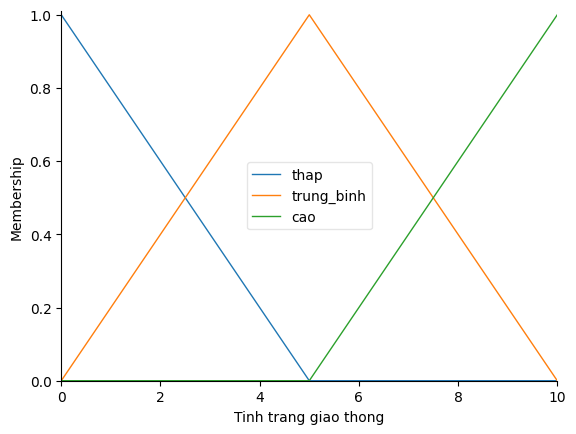

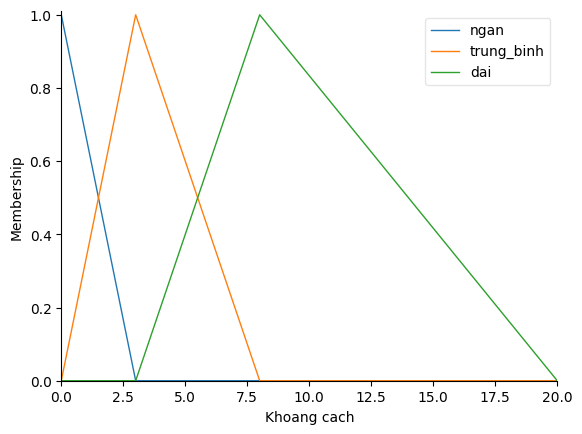

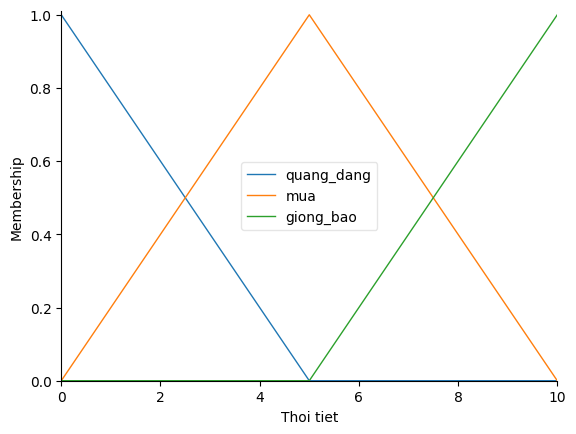

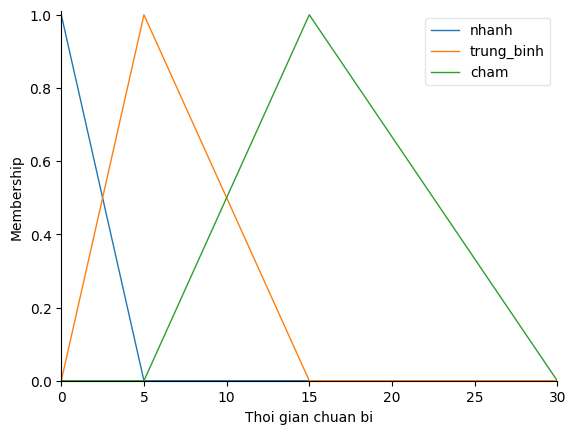

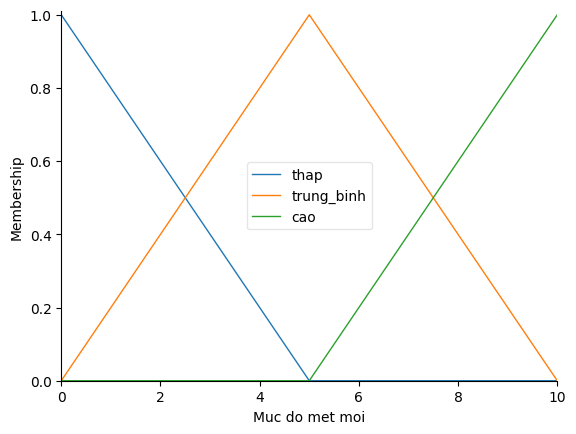

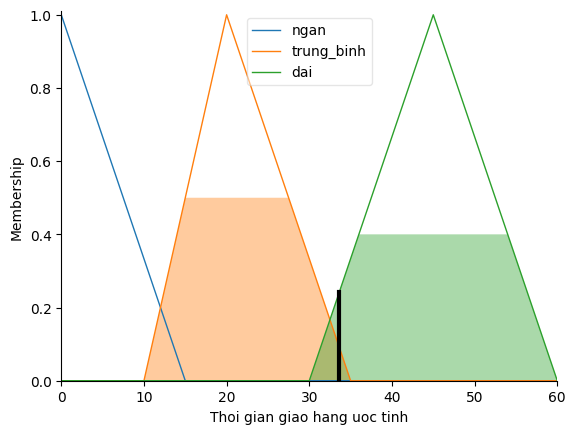

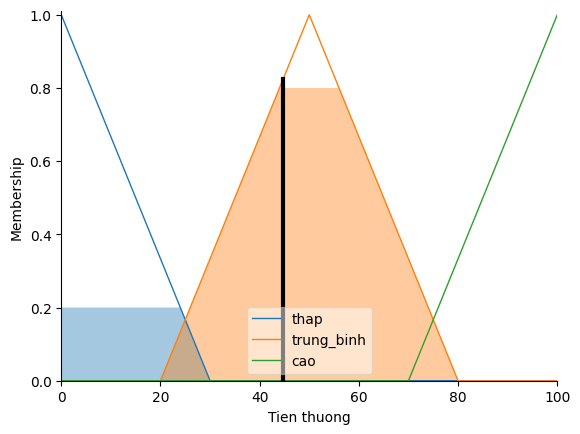

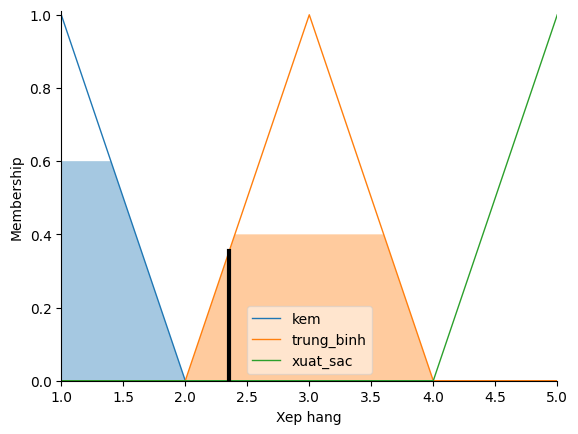

In [225]:
giao_hang_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
giao_hang_sim = ctrl.ControlSystemSimulation(giao_hang_ctrl)
giao_hang_sim.input['Tinh trang giao thong'] = 7
giao_hang_sim.input['Khoang cach'] = 6
giao_hang_sim.input['Thoi tiet'] = 4
giao_hang_sim.input['Thoi gian chuan bi'] = 10
giao_hang_sim.input['Muc do met moi'] = 8
giao_hang_sim.compute()
print("Thời gian giao hàng ước tính:", giao_hang_sim.output['Thoi gian giao hang uoc tinh'])
print("Tiền thưởng khuyến khích:", giao_hang_sim.output['Tien thuong'])
print("Xếp hạng hiệu suất:", giao_hang_sim.output['Xep hang'])
tinh_trang_giao_thong.view()
khoang_cach.view()
thoi_tiet.view()
thoi_gian_chuan_bi.view()
muc_do_met_moi.view()
thoi_gian_giao_hang_uoc_tinh.view(sim=giao_hang_sim)
tien_thuong.view(sim=giao_hang_sim)
xep_hang.view(sim=giao_hang_sim)

In [226]:
#vi du11

In [227]:
cau = ctrl.Antecedent(np.arange(0, 11, 1), 'Cau')
gia_doi_thu = ctrl.Antecedent(np.arange(0, 11, 1), 'Gia doi thu')
chi_phi = ctrl.Antecedent(np.arange(0, 11, 1), 'Chi phi')
thoi_vu = ctrl.Antecedent(np.arange(0, 11, 1), 'Thoi vu')
ton_kho = ctrl.Antecedent(np.arange(0, 101, 1), 'Ton kho')
gia_cuoi = ctrl.Consequent(np.arange(0, 101, 1), 'a')
cau['rat_thap'] = fuzz.trimf(cau.universe, [0, 0, 2])
cau['thap'] = fuzz.trimf(cau.universe, [0, 2, 5])
cau['trung_binh'] = fuzz.trimf(cau.universe, [3, 5, 7])
cau['cao'] = fuzz.trimf(cau.universe, [5, 8, 10])
cau['rat_cao'] = fuzz.trimf(cau.universe, [8, 10, 10])
gia_doi_thu['rat_thap'] = fuzz.trimf(gia_doi_thu.universe, [0, 0, 2])
gia_doi_thu['thap'] = fuzz.trimf(gia_doi_thu.universe, [0, 2, 5])
gia_doi_thu['trung_binh'] = fuzz.trimf(gia_doi_thu.universe, [3, 5, 7])
gia_doi_thu['cao'] = fuzz.trimf(gia_doi_thu.universe, [5, 8, 10])
gia_doi_thu['rat_cao'] = fuzz.trimf(gia_doi_thu.universe, [8, 10, 10])

chi_phi['thap'] = fuzz.trimf(chi_phi.universe, [0, 0, 5])
chi_phi['trung_binh'] = fuzz.trimf(chi_phi.universe, [0, 5, 10])
chi_phi['cao'] = fuzz.trimf(chi_phi.universe, [5, 10, 10])
thoi_vu['ngoai_gio'] = fuzz.trimf(thoi_vu.universe, [0, 0, 5])
thoi_vu['binh_thuong'] = fuzz.trimf(thoi_vu.universe, [0, 5, 10])
thoi_vu['cao_diem'] = fuzz.trimf(thoi_vu.universe, [5, 10, 10])
ton_kho['thap'] = fuzz.trimf(ton_kho.universe, [0, 0, 30])
ton_kho['trung_binh'] = fuzz.trimf(ton_kho.universe, [20, 50, 80])
ton_kho['cao'] = fuzz.trimf(ton_kho.universe, [50, 80, 100])
ton_kho['rat_cao'] = fuzz.trimf(ton_kho.universe, [80, 100, 100])
gia_cuoi['rat_thap'] = fuzz.trimf(gia_cuoi.universe, [0, 0, 20])
gia_cuoi['thap'] = fuzz.trimf(gia_cuoi.universe, [10, 30, 50])
gia_cuoi['trung_binh'] = fuzz.trimf(gia_cuoi.universe, [40, 60, 80])
gia_cuoi['cao'] = fuzz.trimf(gia_cuoi.universe, [70, 90, 100])
gia_cuoi['rat_cao'] = fuzz.trimf(gia_cuoi.universe, [80, 100, 100])

In [228]:
rule1 = ctrl.Rule(cau['rat_cao'] & gia_doi_thu['thap'] & ton_kho['thap'], gia_cuoi['rat_cao'])
rule2 = ctrl.Rule(cau['rat_cao'] & thoi_vu['cao_diem'] & ton_kho['thap'], gia_cuoi['rat_cao'])
rule3 = ctrl.Rule(cau['trung_binh'] & chi_phi['cao'] & ton_kho['thap'], gia_cuoi['rat_cao'])

rule4 = ctrl.Rule(cau['rat_cao'] & gia_doi_thu['trung_binh'] & ton_kho['trung_binh'], gia_cuoi['cao'])
rule5 = ctrl.Rule(cau['trung_binh'] & gia_doi_thu['cao'] & ton_kho['thap'], gia_cuoi['cao'])
rule6 = ctrl.Rule(cau['rat_cao'] & thoi_vu['cao_diem'] & ton_kho['trung_binh'], gia_cuoi['cao'])

rule7 = ctrl.Rule(cau['trung_binh'] & gia_doi_thu['trung_binh'] & ton_kho['trung_binh'], gia_cuoi['trung_binh'])
rule8 = ctrl.Rule(cau['trung_binh'] & gia_doi_thu['cao'] & ton_kho['trung_binh'], gia_cuoi['trung_binh'])
rule9 = ctrl.Rule(cau['thap'] & gia_doi_thu['cao'] & ton_kho['trung_binh'], gia_cuoi['trung_binh'])
rule10 = ctrl.Rule(cau['trung_binh'] & chi_phi['trung_binh'] & ton_kho['trung_binh'], gia_cuoi['trung_binh'])

rule11 = ctrl.Rule(cau['thap'] & gia_doi_thu['thap'] & ton_kho['cao'], gia_cuoi['thap'])
rule12 = ctrl.Rule(cau['trung_binh'] & chi_phi['trung_binh'] & ton_kho['cao'], gia_cuoi['thap'])
rule13 = ctrl.Rule(cau['thap'] & thoi_vu['ngoai_gio'] & ton_kho['cao'], gia_cuoi['thap'])

rule14 = ctrl.Rule(cau['thap'] & gia_doi_thu['thap'] & ton_kho['rat_cao'], gia_cuoi['rat_thap'])
rule15 = ctrl.Rule(cau['rat_thap'] & thoi_vu['ngoai_gio'] & ton_kho['rat_cao'], gia_cuoi['rat_thap'])
rule16 = ctrl.Rule(cau['trung_binh'] & gia_doi_thu['rat_thap'] & ton_kho['rat_cao'], gia_cuoi['rat_thap'])

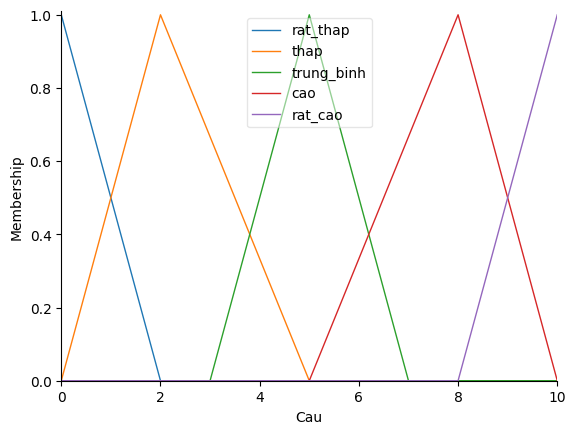

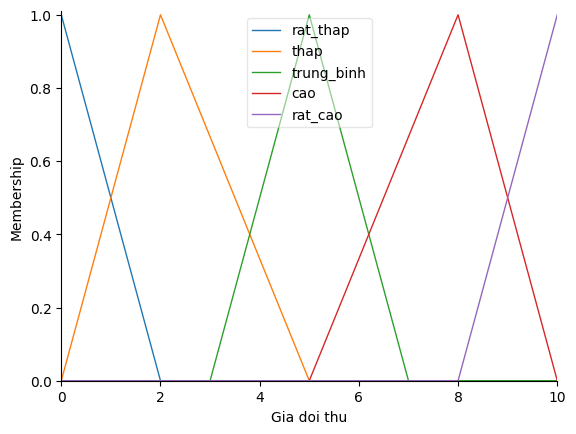

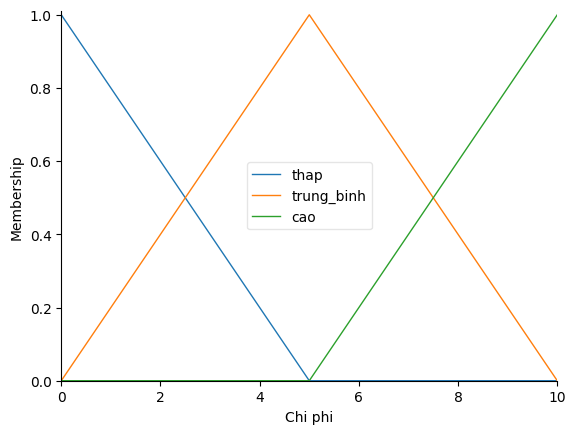

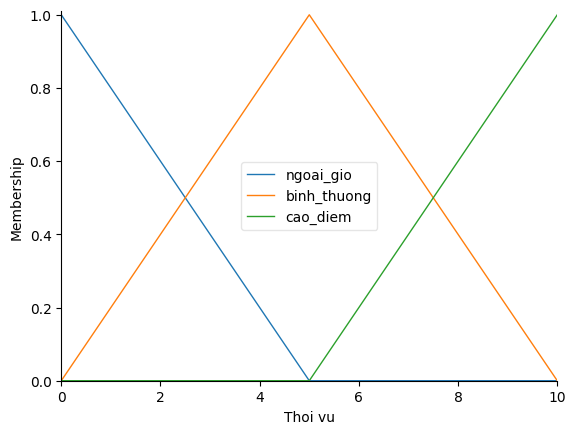

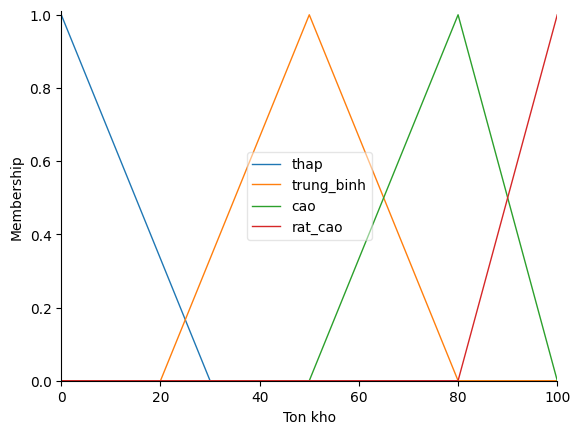

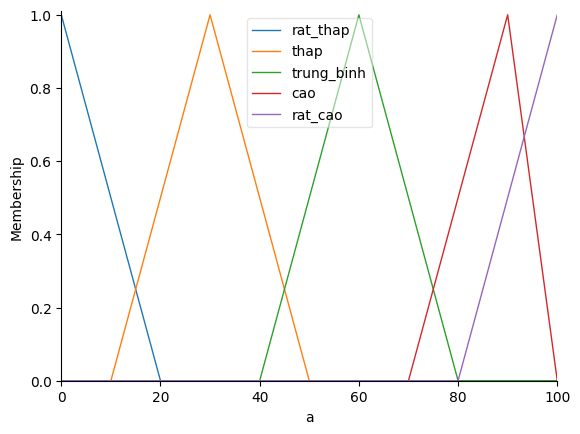

In [229]:
dinh_gia_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16])
dinh_gia_sim = ctrl.ControlSystemSimulation(dinh_gia_ctrl)
dinh_gia_sim.input['Cau'] = 7
dinh_gia_sim.input['Gia doi thu'] = 4
dinh_gia_sim.input['Chi phi'] = 6
dinh_gia_sim.input['Thoi vu'] = 8
dinh_gia_sim.input['Ton kho'] = 20
dinh_gia_sim.compute()
cau.view()
gia_doi_thu.view()
chi_phi.view()
thoi_vu.view()
ton_kho.view()
gia_cuoi.view(sim=dinh_gia_sim)

In [230]:
#Bai tap 1

Giá đi xe ước tính: 45.77777777777776
Điểm thưởng cho khách hàng: 60.0


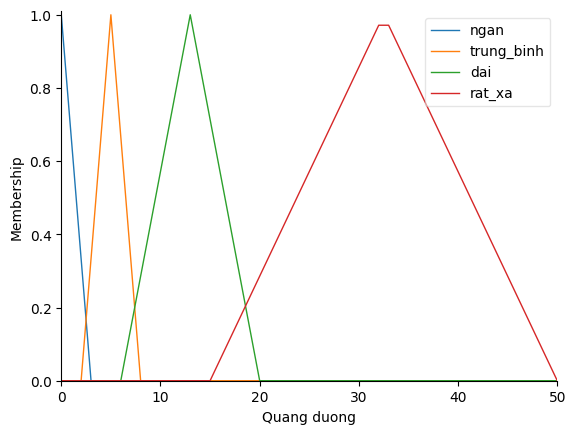

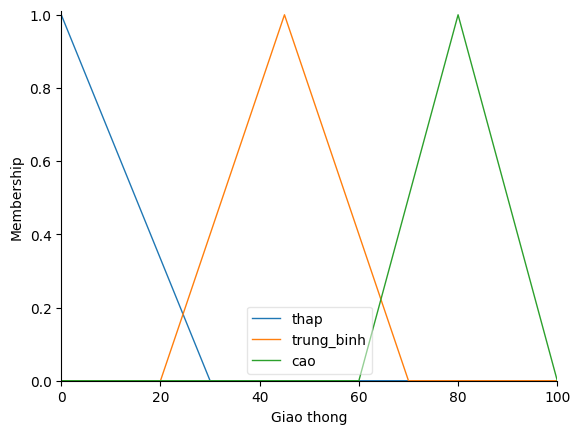

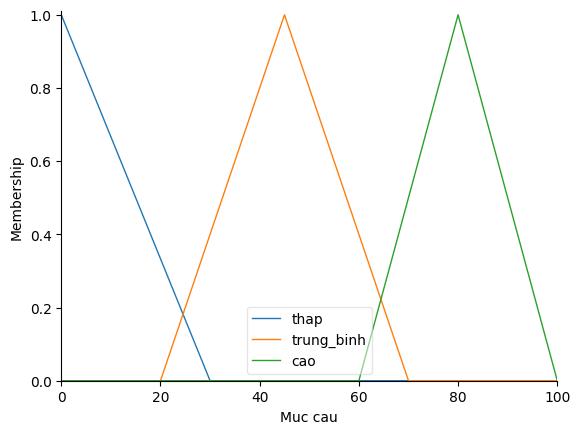

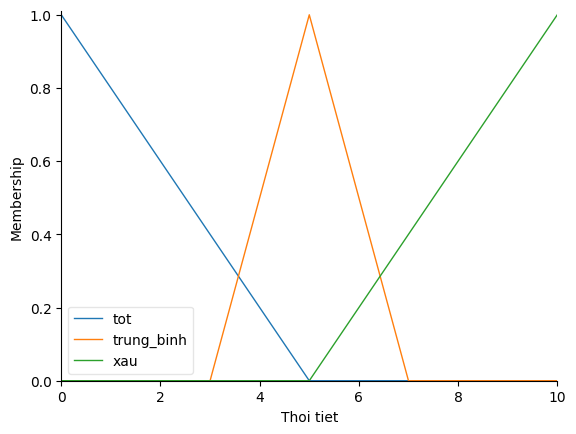

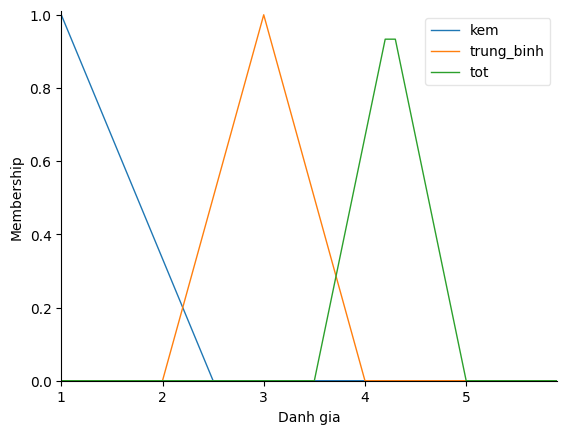

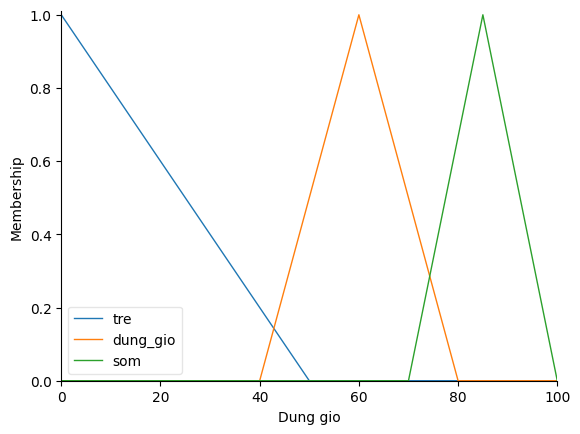

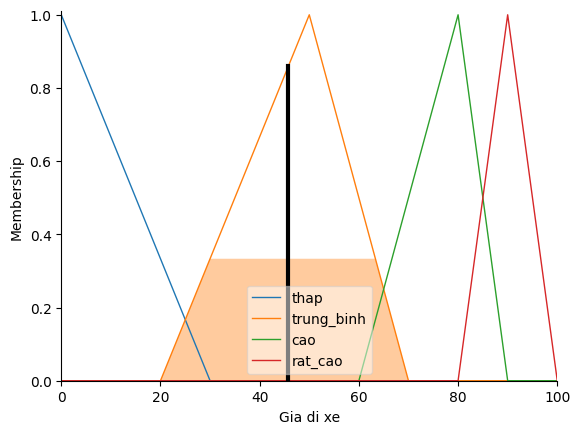

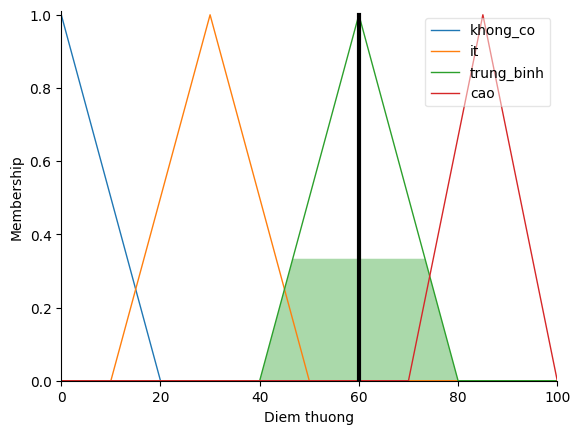

In [231]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
quang_duong = ctrl.Antecedent(np.arange(0, 51, 1), 'Quang duong')
giao_thong = ctrl.Antecedent(np.arange(0, 101, 1), 'Giao thong')
muc_cau = ctrl.Antecedent(np.arange(0, 101, 1), 'Muc cau')
thoi_tiet = ctrl.Antecedent(np.arange(0, 11, 1), 'Thoi tiet')
danh_gia = ctrl.Antecedent(np.arange(1, 6, 0.1), 'Danh gia')
dung_gio = ctrl.Antecedent(np.arange(0, 101, 1), 'Dung gio')
gia_di_xe = ctrl.Consequent(np.arange(0, 101, 1), 'Gia di xe')
diem_thuong = ctrl.Consequent(np.arange(0, 101, 1), 'Diem thuong')
quang_duong['ngan'] = fuzz.trimf(quang_duong.universe, [0, 0, 3])
quang_duong['trung_binh'] = fuzz.trimf(quang_duong.universe, [2, 5, 8])
quang_duong['dai'] = fuzz.trimf(quang_duong.universe, [6, 13, 20])
quang_duong['rat_xa'] = fuzz.trimf(quang_duong.universe, [15, 32.5, 50])
giao_thong['thap'] = fuzz.trimf(giao_thong.universe, [0, 0, 30])
giao_thong['trung_binh'] = fuzz.trimf(giao_thong.universe, [20, 45, 70])
giao_thong['cao'] = fuzz.trimf(giao_thong.universe, [60, 80, 100])
muc_cau['thap'] = fuzz.trimf(muc_cau.universe, [0, 0, 30])
muc_cau['trung_binh'] = fuzz.trimf(muc_cau.universe, [20, 45, 70])
muc_cau['cao'] = fuzz.trimf(muc_cau.universe, [60, 80, 100])
thoi_tiet['tot'] = fuzz.trimf(thoi_tiet.universe, [0, 0, 5])
thoi_tiet['trung_binh'] = fuzz.trimf(thoi_tiet.universe, [3, 5, 7])
thoi_tiet['xau'] = fuzz.trimf(thoi_tiet.universe, [5, 10, 10])
danh_gia['kem'] = fuzz.trimf(danh_gia.universe, [1, 1, 2.5])
danh_gia['trung_binh'] = fuzz.trimf(danh_gia.universe, [2, 3, 4])
danh_gia['tot'] = fuzz.trimf(danh_gia.universe, [3.5, 4.25, 5])
dung_gio['tre'] = fuzz.trimf(dung_gio.universe, [0, 0, 50])
dung_gio['dung_gio'] = fuzz.trimf(dung_gio.universe, [40, 60, 80])
dung_gio['som'] = fuzz.trimf(dung_gio.universe, [70, 85, 100])
gia_di_xe['thap'] = fuzz.trimf(gia_di_xe.universe, [0, 0, 30])
gia_di_xe['trung_binh'] = fuzz.trimf(gia_di_xe.universe, [20, 50, 70])
gia_di_xe['cao'] = fuzz.trimf(gia_di_xe.universe, [60, 80, 90])
gia_di_xe['rat_cao'] = fuzz.trimf(gia_di_xe.universe, [80, 90, 100])
diem_thuong['khong_co'] = fuzz.trimf(diem_thuong.universe, [0, 0, 20])
diem_thuong['it'] = fuzz.trimf(diem_thuong.universe, [10, 30, 50])
diem_thuong['trung_binh'] = fuzz.trimf(diem_thuong.universe, [40, 60, 80])
diem_thuong['cao'] = fuzz.trimf(diem_thuong.universe, [70, 85, 100])
rule1 = ctrl.Rule(quang_duong['ngan'] & giao_thong['thap'] & muc_cau['thap'], gia_di_xe['thap'])
rule2 = ctrl.Rule(quang_duong['ngan'] & giao_thong['trung_binh'] & muc_cau['cao'], gia_di_xe['trung_binh'])
rule3 = ctrl.Rule(quang_duong['trung_binh'] & giao_thong['cao'] & muc_cau['cao'], gia_di_xe['cao'])
rule4 = ctrl.Rule(quang_duong['dai'] & giao_thong['trung_binh'] & thoi_tiet['tot'], gia_di_xe['trung_binh'])
rule5 = ctrl.Rule(quang_duong['dai'] & giao_thong['cao'] & thoi_tiet['xau'], gia_di_xe['rat_cao'])
rule6 = ctrl.Rule(quang_duong['rat_xa'] & giao_thong['cao'] & muc_cau['cao'], gia_di_xe['rat_cao'])
rule7 = ctrl.Rule(quang_duong['trung_binh'] & giao_thong['thap'] & muc_cau['thap'], gia_di_xe['trung_binh'])
rule8 = ctrl.Rule(quang_duong['ngan'] & giao_thong['cao'] & thoi_tiet['xau'], gia_di_xe['cao'])
rule9 = ctrl.Rule(quang_duong['rat_xa'] & thoi_tiet['xau'], gia_di_xe['rat_cao'])
rule10 = ctrl.Rule(quang_duong['trung_binh'] & giao_thong['trung_binh'] & thoi_tiet['trung_binh'], gia_di_xe['trung_binh'])
rule11 = ctrl.Rule(danh_gia['tot'] & dung_gio['som'], diem_thuong['cao'])
rule12 = ctrl.Rule(danh_gia['trung_binh'] & dung_gio['dung_gio'], diem_thuong['trung_binh'])
rule13 = ctrl.Rule(danh_gia['kem'] & dung_gio['tre'], diem_thuong['khong_co'])
rule14 = ctrl.Rule(quang_duong['dai'] & giao_thong['cao'] & dung_gio['dung_gio'], diem_thuong['cao'])
rule15 = ctrl.Rule(quang_duong['trung_binh'] & giao_thong['trung_binh'] & danh_gia['tot'], diem_thuong['trung_binh'])
rule16 = ctrl.Rule(danh_gia['kem'] & dung_gio['tre'], diem_thuong['khong_co'])
rule17 = ctrl.Rule(quang_duong['rat_xa'] & thoi_tiet['xau'] & danh_gia['tot'], diem_thuong['cao'])
rule18 = ctrl.Rule(quang_duong['ngan'] & danh_gia['trung_binh'] & dung_gio['dung_gio'], diem_thuong['it'])
rule19 = ctrl.Rule(quang_duong['dai'] & giao_thong['cao'] & dung_gio['tre'], diem_thuong['it'])
rule20 = ctrl.Rule(quang_duong['trung_binh'] & thoi_tiet['trung_binh'] & danh_gia['tot'], diem_thuong['trung_binh'])
gia_di_xe_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
                                      rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20])
gia_di_xe_sim = ctrl.ControlSystemSimulation(gia_di_xe_ctrl)
gia_di_xe_sim.input['Quang duong'] = 7
gia_di_xe_sim.input['Giao thong'] = 60
gia_di_xe_sim.input['Muc cau'] = 80
gia_di_xe_sim.input['Thoi tiet'] = 6
gia_di_xe_sim.input['Danh gia'] = 4.2
gia_di_xe_sim.input['Dung gio'] = 30
gia_di_xe_sim.compute()
print("Giá đi xe ước tính:", gia_di_xe_sim.output['Gia di xe'])
print("Điểm thưởng cho khách hàng:", gia_di_xe_sim.output['Diem thuong'])
quang_duong.view()
giao_thong.view()
muc_cau.view()
thoi_tiet.view()
danh_gia.view()
dung_gio.view()
gia_di_xe.view(sim=gia_di_xe_sim)
diem_thuong.view(sim=gia_di_xe_sim)

In [232]:
#Bai tap 2

In [233]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
xep_hang = ctrl.Antecedent(np.arange(0, 5.1, 0.1), 'Xep hang')
khoi_luong_ban = ctrl.Antecedent(np.arange(0, 101, 1), 'Khoi luong ban')
bien_loi_nhuan = ctrl.Antecedent(np.arange(0, 101, 1), 'Bien loi nhuan')
su_kien = ctrl.Antecedent(np.arange(0, 11, 1), 'Su kien')
doi_thu = ctrl.Antecedent(np.arange(0, 11, 1), 'Doi thu')
ty_le_chiet_khau = ctrl.Consequent(np.arange(0, 71, 1), 'Ty le chiet khau')
xep_hang['thap'] = fuzz.trimf(xep_hang.universe, [0, 0, 4])
xep_hang['trung_binh'] = fuzz.trimf(xep_hang.universe, [3.5, 4.0, 4.5])
xep_hang['cao'] = fuzz.trimf(xep_hang.universe, [4.0, 4.5, 5])
khoi_luong_ban['thap'] = fuzz.trimf(khoi_luong_ban.universe, [0, 0, 50])
khoi_luong_ban['trung_binh'] = fuzz.trimf(khoi_luong_ban.universe, [40, 50, 60])
khoi_luong_ban['cao'] = fuzz.trimf(khoi_luong_ban.universe, [50, 75, 100])
bien_loi_nhuan['thap'] = fuzz.trimf(bien_loi_nhuan.universe, [0, 0, 40])
bien_loi_nhuan['trung_binh'] = fuzz.trimf(bien_loi_nhuan.universe, [30, 40, 60])
bien_loi_nhuan['cao'] = fuzz.trimf(bien_loi_nhuan.universe, [50, 75, 100]
su_kien['khong_co'] = fuzz.trimf(su_kien.universe, [0, 0, 3])
su_kien['trung_binh'] = fuzz.trimf(su_kien.universe, [2, 5, 8])
su_kien['cao'] = fuzz.trimf(su_kien.universe, [7, 10, 10])
doi_thu['thap'] = fuzz.trimf(doi_thu.universe, [0, 0, 3])
doi_thu['trung_binh'] = fuzz.trimf(doi_thu.universe, [2, 5, 8])
doi_thu['cao'] = fuzz.trimf(doi_thu.universe, [7, 10, 10])
ty_le_chiet_khau['rat_thap'] = fuzz.trimf(ty_le_chiet_khau.universe, [0, 0, 5])
ty_le_chiet_khau['thap'] = fuzz.trimf(ty_le_chiet_khau.universe, [0, 5, 10])
ty_le_chiet_khau['trung_binh'] = fuzz.trimf(ty_le_chiet_khau.universe, [10, 15, 20])
ty_le_chiet_khau['cao'] = fuzz.trimf(ty_le_chiet_khau.universe, [20, 35, 40])
ty_le_chiet_khau['rat_cao'] = fuzz.trimf(ty_le_chiet_khau.universe, [40, 55, 70])
rule1 = ctrl.Rule(xep_hang['cao'] & khoi_luong_ban['cao'] & bien_loi_nhuan['cao'], ty_le_chiet_khau['rat_thap'])
rule2 = ctrl.Rule(xep_hang['thap'] & khoi_luong_ban['thap'] & bien_loi_nhuan['cao'], ty_le_chiet_khau['cao'])
rule3 = ctrl.Rule(su_kien['cao'] & doi_thu['cao'], ty_le_chiet_khau['rat_cao'])
rule4 = ctrl.Rule(xep_hang['trung_binh'] & khoi_luong_ban['trung_binh'] & bien_loi_nhuan['trung_binh'], ty_le_chiet_khau['trung_binh'])
rule5 = ctrl.Rule(doi_thu['thap'] & bien_loi_nhuan['thap'] & khoi_luong_ban['cao'], ty_le_chiet_khau['rat_thap'])
rule6 = ctrl.Rule(xep_hang['thap'] & su_kien['khong_co'], ty_le_chiet_khau['trung_binh'])
rule7 = ctrl.Rule(khoi_luong_ban['thap'] & bien_loi_nhuan['thap'], ty_le_chiet_khau['rat_cao'])
chiet_khau_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
chiet_khau_sim = ctrl.ControlSystemSimulation(chiet_khau_ctrl)
chiet_khau_sim.input['Xep hang'] = 4.3
chiet_khau_sim.input['Khoi luong ban'] = 50
chiet_khau_sim.input['Bien loi nhuan'] = 30
chiet_khau_sim.input['Su kien'] = 8
chiet_khau_sim.input['Doi thu'] = 8
chiet_khau_sim.compute()
print("Tỷ lệ phần trăm chiết khấu được đề xuất:", chiet_khau_sim.output['Ty le chiet khau'])
xep_hang.view()
khoi_luong_ban.view()
bien_loi_nhuan.view()
su_kien.view()
doi_thu.view()
ty_le_chiet_khau.view(sim=chiet_khau_sim)

SyntaxError: '(' was never closed (2543117743.py, line 18)

In [ ]:
#bai tap 3

In [ ]:
nhu_cau = ctrl.Antecedent(np.arange(0, 11, 1), 'Nhu cau')
ap_luc_doi_thu = ctrl.Antecedent(np.arange(0, 11, 1), 'Ap luc doi thu')
uy_tin = ctrl.Antecedent(np.arange(0, 11, 1), 'Uy tin')
loi_nhuan = ctrl.Antecedent(np.arange(0, 101, 1), 'Loi nhuan')
mua_vu = ctrl.Antecedent(np.arange(0, 11, 1), 'Mua vu')

In [ ]:
muc_giam_gia = ctrl.Consequent(np.arange(0, 71, 1), 'Muc giam gia')


In [ ]:
nhu_cau['thap'] = fuzz.trimf(nhu_cau.universe, [0, 0, 5])
nhu_cau['trung_binh'] = fuzz.trimf(nhu_cau.universe, [4, 5, 7])
nhu_cau['cao'] = fuzz.trimf(nhu_cau.universe, [6, 10, 10])

ap_luc_doi_thu['thap'] = fuzz.trimf(ap_luc_doi_thu.universe, [0, 0, 5])
ap_luc_doi_thu['trung_binh'] = fuzz.trimf(ap_luc_doi_thu.universe, [4, 5, 7])
ap_luc_doi_thu['cao'] = fuzz.trimf(ap_luc_doi_thu.universe, [6, 10, 10])

uy_tin['thap'] = fuzz.trimf(uy_tin.universe, [0, 0, 5])
uy_tin['trung_binh'] = fuzz.trimf(uy_tin.universe, [4, 5, 7])
uy_tin['cao'] = fuzz.trimf(uy_tin.universe, [6, 10, 10])

loi_nhuan['thap'] = fuzz.trimf(loi_nhuan.universe, [0, 0, 40])
loi_nhuan['trung_binh'] = fuzz.trimf(loi_nhuan.universe, [30, 40, 60])
loi_nhuan['cao'] = fuzz.trimf(loi_nhuan.universe, [50, 75, 100])

mua_vu['khong_co'] = fuzz.trimf(mua_vu.universe, [0, 0, 3])
mua_vu['trung_binh'] = fuzz.trimf(mua_vu.universe, [2, 5, 8])
mua_vu['cao'] = fuzz.trimf(mua_vu.universe, [7, 10, 10])
muc_giam_gia['rat_thap'] = fuzz.trimf(muc_giam_gia.universe, [0, 0, 5])
muc_giam_gia['thap'] = fuzz.trimf(muc_giam_gia.universe, [0, 5, 10])
muc_giam_gia['trung_binh'] = fuzz.trimf(muc_giam_gia.universe, [10, 15, 20])
muc_giam_gia['cao'] = fuzz.trimf(muc_giam_gia.universe, [20, 30, 40])
muc_giam_gia['rat_cao'] = fuzz.trimf(muc_giam_gia.universe, [40, 55, 70])

In [ ]:
rule1 = ctrl.Rule(nhu_cau['cao'] & ap_luc_doi_thu['thap'] & loi_nhuan['thap'], muc_giam_gia['rat_thap'])
rule2 = ctrl.Rule(nhu_cau['thap'] & ap_luc_doi_thu['cao'] & loi_nhuan['cao'], muc_giam_gia['cao'])
rule3 = ctrl.Rule(uy_tin['cao'] & loi_nhuan['trung_binh'] & mua_vu['cao'], muc_giam_gia['trung_binh'])
rule4 = ctrl.Rule(ap_luc_doi_thu['cao'] & mua_vu['cao'] & loi_nhuan['cao'], muc_giam_gia['rat_cao'])
rule5 = ctrl.Rule(uy_tin['thap'] & nhu_cau['trung_binh'] & loi_nhuan['thap'], muc_giam_gia['trung_binh'])
rule6 = ctrl.Rule(nhu_cau['cao'] & mua_vu['khong_co'] & ap_luc_doi_thu['thap'], muc_giam_gia['rat_thap'])
rule7 = ctrl.Rule(loi_nhuan['cao'] & ap_luc_doi_thu['trung_binh'] & mua_vu['trung_binh'], muc_giam_gia['trung_binh'])

In [ ]:
iam_gia_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])


In [ ]:
giam_gia_sim = ctrl.ControlSystemSimulation(giam_gia_ctrl)

In [ ]:
giam_gia_sim.input['Nhu cau'] = 8
giam_gia_sim.input['Ap luc doi thu'] = 5
giam_gia_sim.input['Uy tin'] = 6
giam_gia_sim.input['Loi nhuan'] = 70
giam_gia_sim.input['Mua vu'] = 8


In [ ]:
giam_gia_sim.compute()

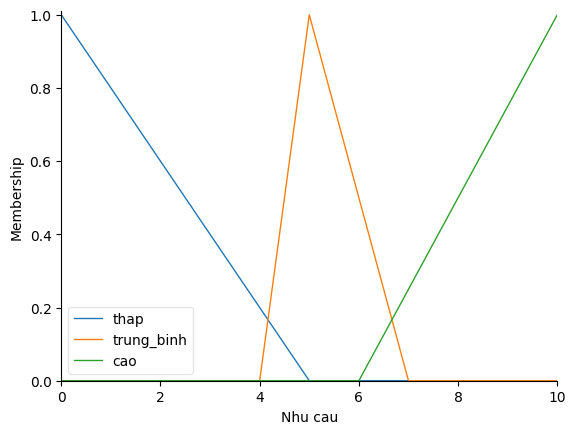

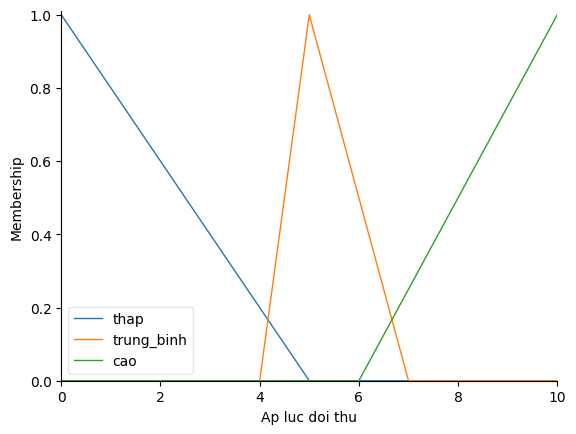

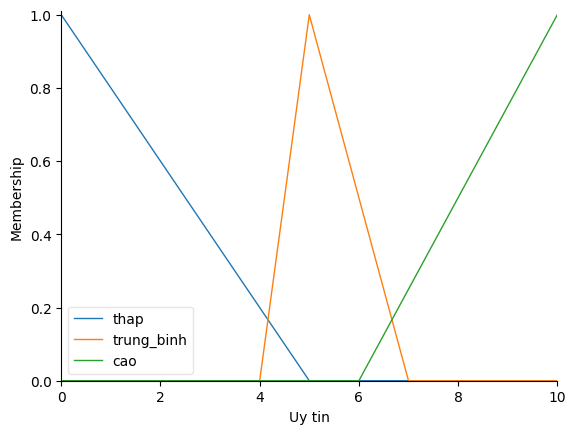

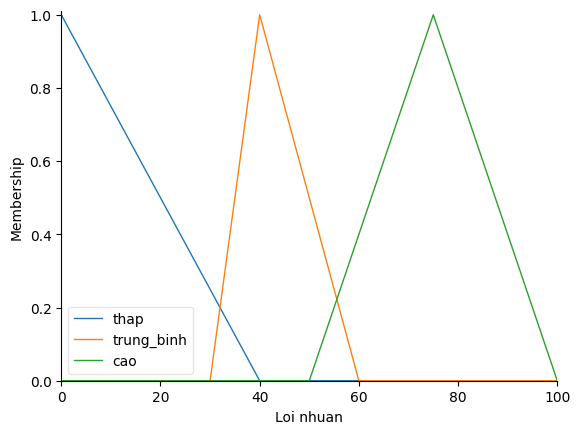

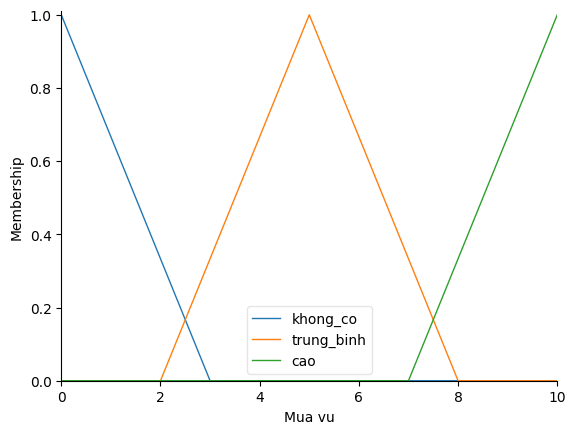

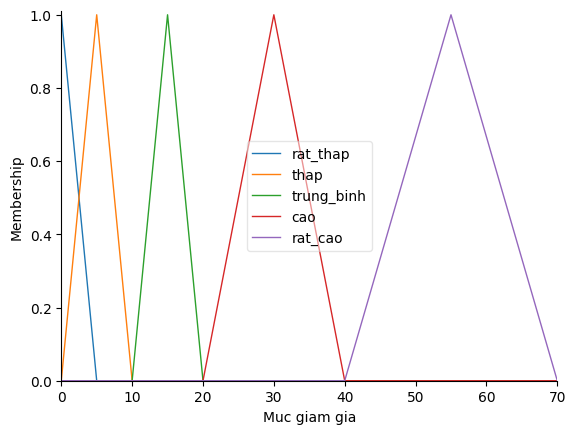

In [ ]:
nhu_cau.view()
ap_luc_doi_thu.view()
uy_tin.view()
loi_nhuan.view()
mua_vu.view()
muc_giam_gia.view(sim=giam_gia_sim)

In [ ]:
#bai tap 4

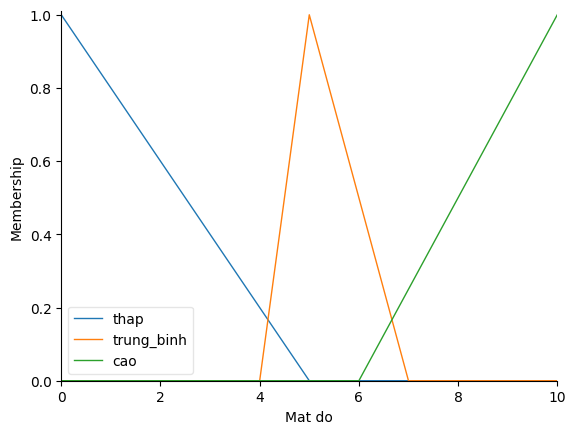

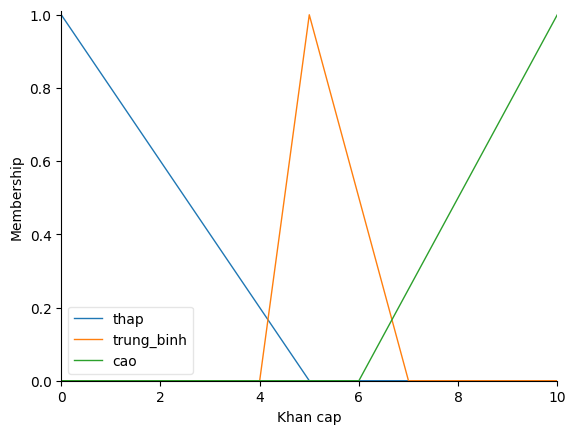

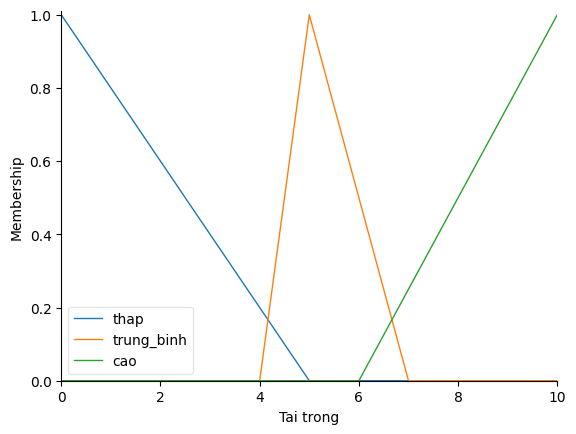

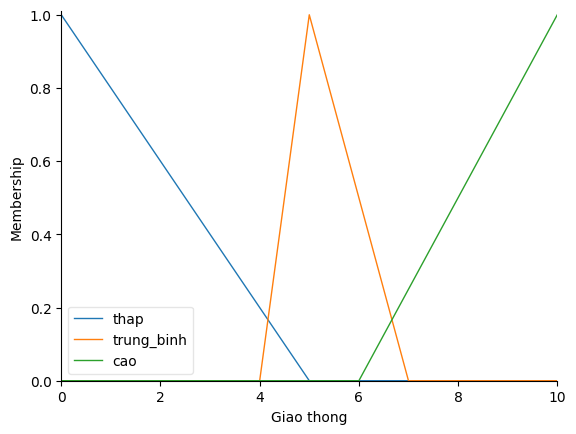

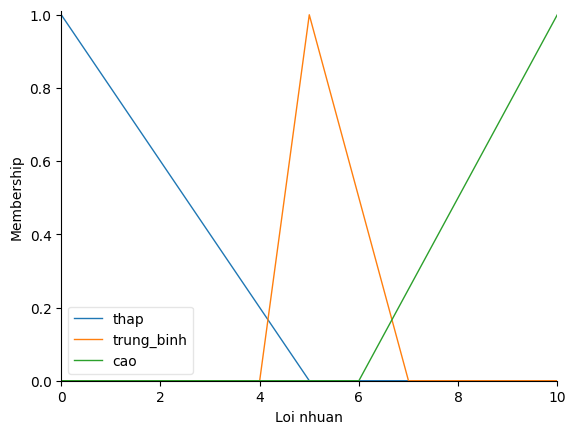

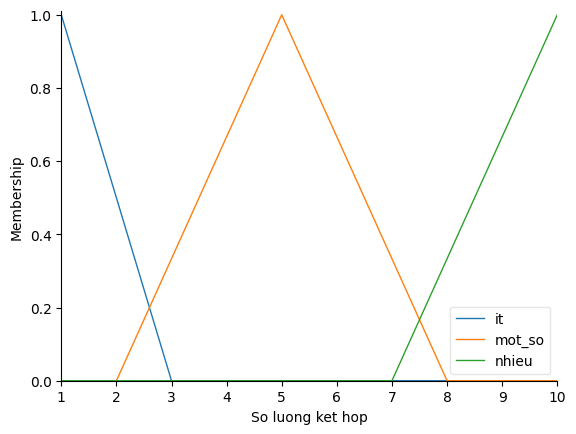

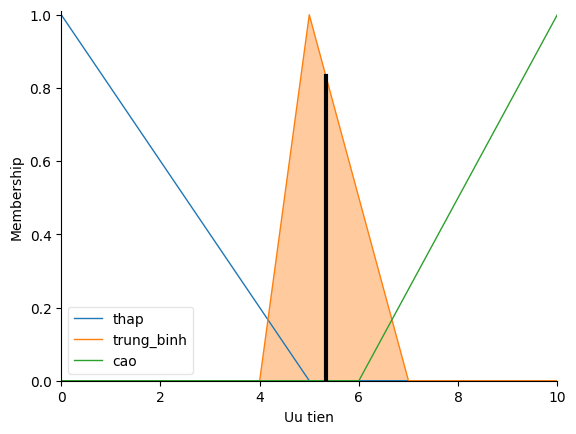

In [ ]:
mat_do = ctrl.Antecedent(np.arange(0, 11, 1), 'Mat do')
khan_cap = ctrl.Antecedent(np.arange(0, 11, 1), 'Khan cap')
tai_trong = ctrl.Antecedent(np.arange(0, 11, 1), 'Tai trong')
giao_thong = ctrl.Antecedent(np.arange(0, 11, 1), 'Giao thong')
loi_nhuan = ctrl.Antecedent(np.arange(0, 11, 1), 'Loi nhuan')
so_luong_ket_hop = ctrl.Consequent(np.arange(1, 11, 1), 'So luong ket hop')
uu_tien = ctrl.Consequent(np.arange(0, 11, 1), 'Uu tien')
mat_do['thap'] = fuzz.trimf(mat_do.universe, [0, 0, 5])
mat_do['trung_binh'] = fuzz.trimf(mat_do.universe, [4, 5, 7])
mat_do['cao'] = fuzz.trimf(mat_do.universe, [6, 10, 10])

khan_cap['thap'] = fuzz.trimf(khan_cap.universe, [0, 0, 5])
khan_cap['trung_binh'] = fuzz.trimf(khan_cap.universe, [4, 5, 7])
khan_cap['cao'] = fuzz.trimf(khan_cap.universe, [6, 10, 10])

tai_trong['thap'] = fuzz.trimf(tai_trong.universe, [0, 0, 5])
tai_trong['trung_binh'] = fuzz.trimf(tai_trong.universe, [4, 5, 7])
tai_trong['cao'] = fuzz.trimf(tai_trong.universe, [6, 10, 10])

giao_thong['thap'] = fuzz.trimf(giao_thong.universe, [0, 0, 5])
giao_thong['trung_binh'] = fuzz.trimf(giao_thong.universe, [4, 5, 7])
giao_thong['cao'] = fuzz.trimf(giao_thong.universe, [6, 10, 10])

loi_nhuan['thap'] = fuzz.trimf(loi_nhuan.universe, [0, 0, 5])
loi_nhuan['trung_binh'] = fuzz.trimf(loi_nhuan.universe, [4, 5, 7])
loi_nhuan['cao'] = fuzz.trimf(loi_nhuan.universe, [6, 10, 10])
so_luong_ket_hop['it'] = fuzz.trimf(so_luong_ket_hop.universe, [1, 1, 3])
so_luong_ket_hop['mot_so'] = fuzz.trimf(so_luong_ket_hop.universe, [2, 5, 8])
so_luong_ket_hop['nhieu'] = fuzz.trimf(so_luong_ket_hop.universe, [7, 10, 10])
uu_tien['thap'] = fuzz.trimf(uu_tien.universe, [0, 0, 5])
uu_tien['trung_binh'] = fuzz.trimf(uu_tien.universe, [4, 5, 7])
uu_tien['cao'] = fuzz.trimf(uu_tien.universe, [6, 10, 10])
rule1 = ctrl.Rule(mat_do['cao'] & tai_trong['thap'] & giao_thong['thap'], [so_luong_ket_hop['nhieu']])
rule2 = ctrl.Rule(mat_do['trung_binh'] & giao_thong['trung_binh'] & khan_cap['trung_binh'], [so_luong_ket_hop['mot_so']])
rule3 = ctrl.Rule(tai_trong['cao'] & mat_do['cao'] & loi_nhuan['cao'], [so_luong_ket_hop['it']])
rule4 = ctrl.Rule(mat_do['trung_binh'] & khan_cap['cao'] & giao_thong['trung_binh'], [so_luong_ket_hop['mot_so']])
rule5 = ctrl.Rule(loi_nhuan['trung_binh'] & khan_cap['cao'] & giao_thong['cao'], [so_luong_ket_hop['mot_so']])
rule6 = ctrl.Rule(khan_cap['cao'] & loi_nhuan['cao'], [uu_tien['cao']])
rule7 = ctrl.Rule(khan_cap['trung_binh'] & giao_thong['trung_binh'], [uu_tien['trung_binh']])
rule8 = ctrl.Rule(khan_cap['cao'] & mat_do['cao'] & loi_nhuan['thap'], [uu_tien['thap']])
dieu_phoi_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
dieu_phoi_sim = ctrl.ControlSystemSimulation(dieu_phoi_ctrl)
dieu_phoi_sim.input['Mat do'] = 8
dieu_phoi_sim.input['Khan cap'] = 5
dieu_phoi_sim.input['Tai trong'] = 2
dieu_phoi_sim.input['Giao thong'] = 5
dieu_phoi_sim.input['Loi nhuan'] = 5
dieu_phoi_sim.compute()
mat_do.view()
khan_cap.view()
tai_trong.view()
giao_thong.view()
loi_nhuan.view()
so_luong_ket_hop.view(sim=dieu_phoi_sim)
uu_tien.view(sim=dieu_phoi_sim)